In [1]:
from DataManager import CALFData, collateGCN
import numpy as np
import torch 
from Model import ContextAwareModel
from helpers.loss import ContextAwareLoss, SpottingLoss
from train import trainer
import pickle
from dataclasses import dataclass
import matplotlib.pyplot as plt
from Visualiser import collateVisGCN, Visualiser
from helpers.evaluation import segmentation_correlation
from helpers.classes import EVENT_DICTIONARY_V2_ALIVE as event_enc
from helpers.classes import get_K_params
import seaborn as sns

# MODEL1 - Ball Recovery, Duel, Shot and Dribble

In [2]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.0
    loss_weight_detection=0.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 4

In [6]:
# args = Args
# collate_fn = collateGCN

# train_dataset = CALFData(split="train", args=args)
# validation_dataset = CALFData(split="validate", args=args)

# train_loader = torch.utils.data.DataLoader(train_dataset,
#             batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# validate_loader = torch.utils.data.DataLoader(validation_dataset,
#             batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# # labels, targets, representations = next(iter(train_loader))

# model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
# criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
# criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
# optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
#                             betas=(0.9, 0.999), eps=1e-07, 
#                             weight_decay=0, amsgrad=False)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

# losses = trainer(train_loader, validate_loader,
#                     model, optimizer, scheduler, 
#                     [criterion_segmentation, criterion_spotting], 
#                     [args.loss_weight_segmentation, args.loss_weight_detection],
#                     model_name=args.model_name,
#                     max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency,
#                     save_dir="models/detector9_1.pth.tar")

Train 1: Time 2.452s (it:2.689s) Data:0.529s (it:0.790s) Loss 8.2776e+03 : 100%|████████████████████████████████████████████████| 57/57 [02:19<00:00,  2.45s/it]
Evaluate 1: Time 1.380s (it:1.772s) Data:0.514s (it:0.494s) Loss 6.1715e+03 : 100%|█████████████████████████████████████████████| 57/57 [01:18<00:00,  1.38s/it]
Train 2: Time 2.443s (it:2.263s) Data:0.527s (it:0.459s) Loss 8.0248e+03 : 100%|████████████████████████████████████████████████| 57/57 [02:19<00:00,  2.44s/it]
Evaluate 2: Time 1.342s (it:1.306s) Data:0.506s (it:0.463s) Loss 5.9024e+03 : 100%|█████████████████████████████████████████████| 57/57 [01:16<00:00,  1.34s/it]
Train 3: Time 2.479s (it:2.306s) Data:0.528s (it:0.459s) Loss 7.4770e+03 : 100%|████████████████████████████████████████████████| 57/57 [02:21<00:00,  2.48s/it]
Evaluate 3: Time 1.314s (it:1.210s) Data:0.503s (it:0.455s) Loss 6.8802e+03 : 100%|█████████████████████████████████████████████| 57/57 [01:14<00:00,  1.31s/it]
Train 4: Time 2.493s (it:2.409s) D

Epoch 00078: reducing learning rate of group 0 to 1.0000e-04.


Train 79: Time 2.151s (it:2.086s) Data:0.504s (it:0.453s) Loss 2.6444e+03 : 100%|███████████████████████████████████████████████| 57/57 [02:02<00:00,  2.15s/it]
Evaluate 79: Time 1.190s (it:1.438s) Data:0.494s (it:0.750s) Loss 4.1364e+03 : 100%|████████████████████████████████████████████| 57/57 [01:07<00:00,  1.19s/it]
Train 80: Time 2.152s (it:2.092s) Data:0.498s (it:0.464s) Loss 2.6189e+03 : 100%|███████████████████████████████████████████████| 57/57 [02:02<00:00,  2.15s/it]
Evaluate 80: Time 1.188s (it:1.430s) Data:0.497s (it:0.758s) Loss 4.1539e+03 : 100%|████████████████████████████████████████████| 57/57 [01:07<00:00,  1.19s/it]
Train 81: Time 2.152s (it:2.043s) Data:0.498s (it:0.458s) Loss 2.5447e+03 : 100%|███████████████████████████████████████████████| 57/57 [02:02<00:00,  2.15s/it]
Evaluate 81: Time 1.192s (it:1.103s) Data:0.495s (it:0.448s) Loss 4.1361e+03 : 100%|████████████████████████████████████████████| 57/57 [01:07<00:00,  1.19s/it]
Train 82: Time 2.135s (it:2.104s) 

Epoch 00104: reducing learning rate of group 0 to 1.0000e-05.


Train 105: Time 2.152s (it:2.101s) Data:0.504s (it:0.455s) Loss 2.5199e+03 : 100%|██████████████████████████████████████████████| 57/57 [02:02<00:00,  2.15s/it]
Evaluate 105: Time 1.172s (it:1.107s) Data:0.488s (it:0.447s) Loss 4.3609e+03 : 100%|███████████████████████████████████████████| 57/57 [01:06<00:00,  1.17s/it]
Train 106: Time 2.152s (it:2.056s) Data:0.506s (it:0.453s) Loss 2.5039e+03 : 100%|██████████████████████████████████████████████| 57/57 [02:02<00:00,  2.15s/it]
Evaluate 106: Time 1.195s (it:1.169s) Data:0.493s (it:0.447s) Loss 4.2631e+03 : 100%|███████████████████████████████████████████| 57/57 [01:08<00:00,  1.20s/it]
Train 107: Time 2.170s (it:1.986s) Data:0.506s (it:0.452s) Loss 2.4874e+03 : 100%|██████████████████████████████████████████████| 57/57 [02:03<00:00,  2.17s/it]
Evaluate 107: Time 1.183s (it:1.153s) Data:0.487s (it:0.449s) Loss 4.2382e+03 : 100%|███████████████████████████████████████████| 57/57 [01:07<00:00,  1.18s/it]
Train 108: Time 2.159s (it:2.435s)

Epoch 00130: reducing learning rate of group 0 to 1.0000e-06.


Train 131: Time 2.171s (it:2.143s) Data:0.498s (it:0.452s) Loss 2.5125e+03 : 100%|██████████████████████████████████████████████| 57/57 [02:03<00:00,  2.17s/it]
Evaluate 131: Time 1.192s (it:1.086s) Data:0.496s (it:0.448s) Loss 4.2409e+03 : 100%|███████████████████████████████████████████| 57/57 [01:07<00:00,  1.19s/it]
Train 132: Time 2.168s (it:2.060s) Data:0.498s (it:0.454s) Loss 2.4535e+03 : 100%|██████████████████████████████████████████████| 57/57 [02:03<00:00,  2.17s/it]
Evaluate 132: Time 1.263s (it:1.266s) Data:0.497s (it:0.467s) Loss 4.2718e+03 : 100%|███████████████████████████████████████████| 57/57 [01:11<00:00,  1.26s/it]
Train 133: Time 19.252s (it:2.107s) Data:0.728s (it:0.450s) Loss 2.4666e+03 : 100%|█████████████████████████████████████████████| 57/57 [18:17<00:00, 19.25s/it]
Evaluate 133: Time 1.196s (it:1.122s) Data:0.499s (it:0.447s) Loss 4.2641e+03 : 100%|███████████████████████████████████████████| 57/57 [01:08<00:00,  1.20s/it]
Train 134: Time 2.134s (it:2.050s)

Epoch 00156: reducing learning rate of group 0 to 1.0000e-07.


Train 157: Time 2.163s (it:2.095s) Data:0.506s (it:0.457s) Loss 2.4611e+03 : 100%|██████████████████████████████████████████████| 57/57 [02:03<00:00,  2.16s/it]
Evaluate 157: Time 1.181s (it:1.100s) Data:0.488s (it:0.448s) Loss 4.2431e+03 : 100%|███████████████████████████████████████████| 57/57 [01:07<00:00,  1.18s/it]
Train 158: Time 2.162s (it:2.107s) Data:0.504s (it:0.455s) Loss 2.4578e+03 : 100%|██████████████████████████████████████████████| 57/57 [02:03<00:00,  2.16s/it]
Evaluate 158: Time 1.181s (it:1.431s) Data:0.492s (it:0.741s) Loss 4.2664e+03 : 100%|███████████████████████████████████████████| 57/57 [01:07<00:00,  1.18s/it]
Train 159: Time 2.145s (it:1.982s) Data:0.502s (it:0.454s) Loss 2.4532e+03 : 100%|██████████████████████████████████████████████| 57/57 [02:02<00:00,  2.15s/it]
Evaluate 159: Time 1.176s (it:1.366s) Data:0.494s (it:0.737s) Loss 4.3080e+03 : 100%|███████████████████████████████████████████| 57/57 [01:07<00:00,  1.18s/it]
Train 160: Time 2.133s (it:2.033s)

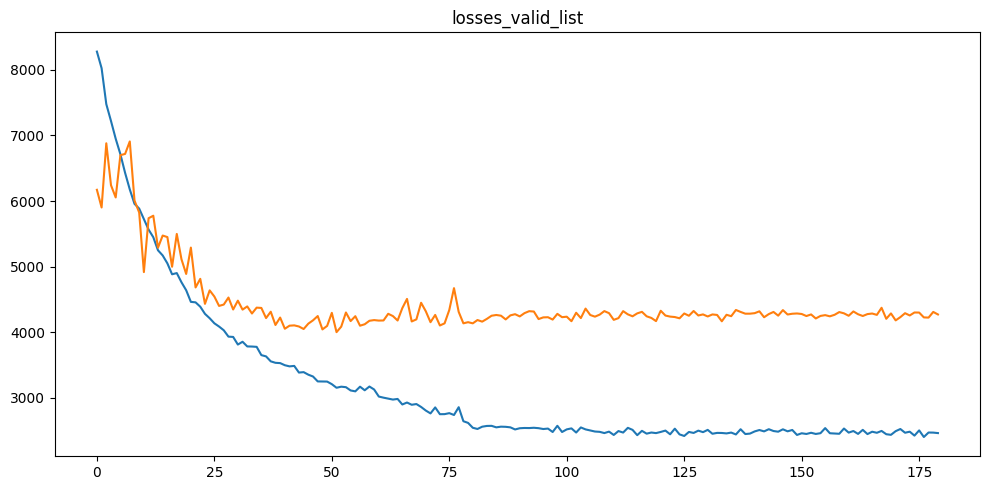

In [10]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
# loss_pairs = [
#     ('losses_train_list', 'losses_valid_list'), 
#     ]
# # Loop through each subplot

# loss_pair = loss_pairs[0]
# for loss in loss_pair:
#     ax.plot(losses.__dict__[loss])
#     ax.set_title(loss)

# # Adjust layout for better spacing
# plt.tight_layout()

# # Show the plots
# plt.show()

Data preprocessing: 100%|██████████| 1/1 [00:08<00:00,  8.45s/it]


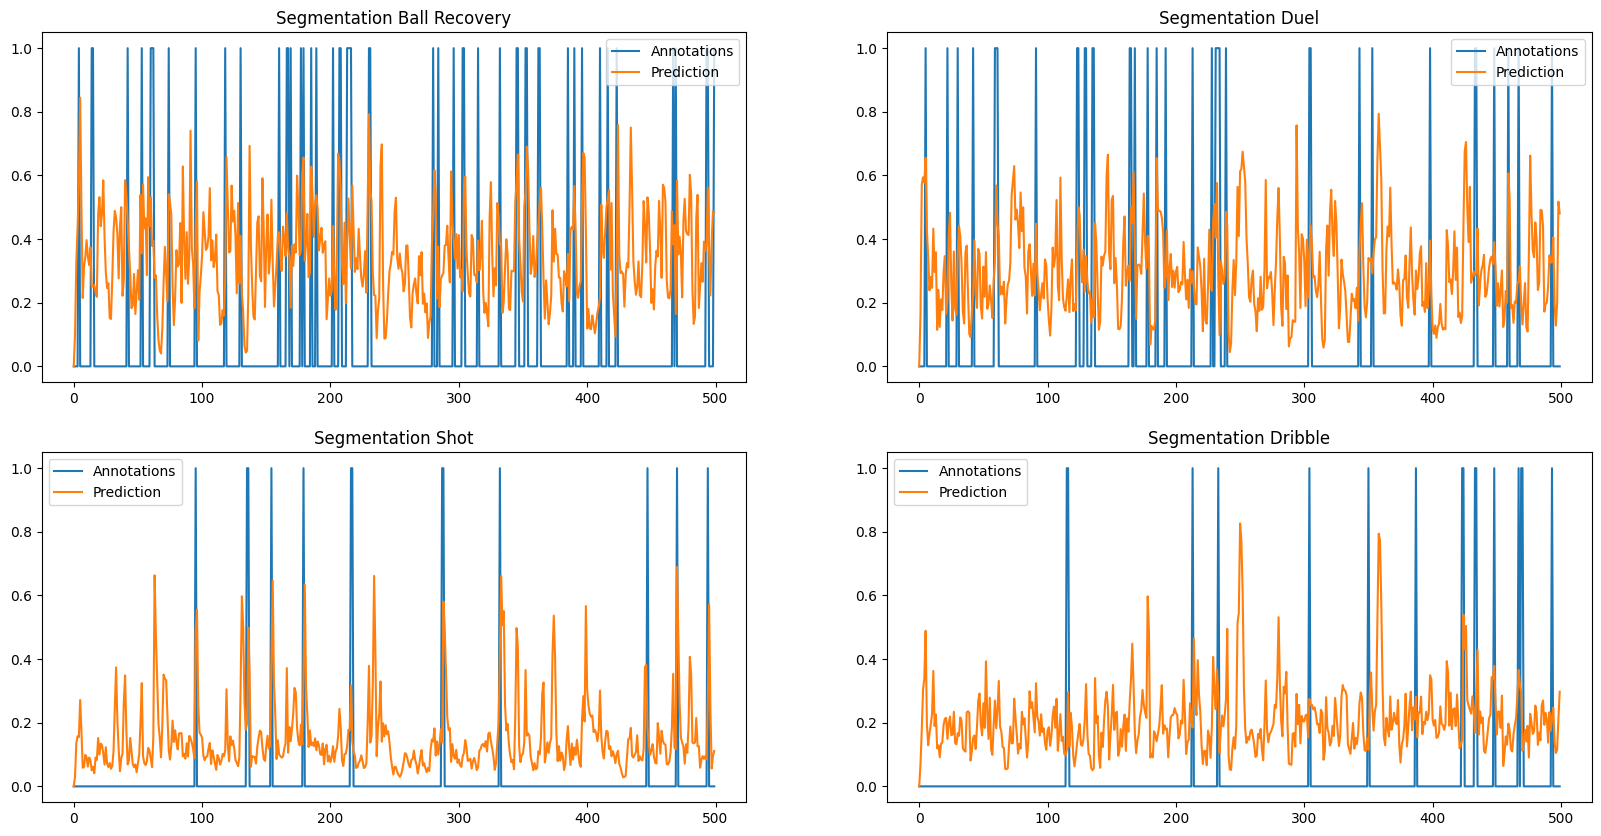

In [3]:
args = Args
collate_fn = collateVisGCN
model_path = "models/detector.pth.tar"
model = torch.load(model_path)
visualiser = Visualiser(collate_fn, args, model, smooth_rate=30, val=True)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation=None)

# MODEL 2 - Play with K parameters

In [2]:
@dataclass
class Args:
    receptive_field = 10
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 40
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.0
    loss_weight_detection=0.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 4

In [3]:
# args = Args
# collate_fn = collateGCN

# train_dataset = CALFData(split="train", args=args)
# validation_dataset = CALFData(split="validate", args=args)

# train_loader = torch.utils.data.DataLoader(train_dataset,
#             batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# validate_loader = torch.utils.data.DataLoader(validation_dataset,
#             batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
# criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
# criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
# optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
#                             betas=(0.9, 0.999), eps=1e-07, 
#                             weight_decay=0, amsgrad=False)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

# losses = trainer(train_loader, validate_loader,
#                     model, optimizer, scheduler, 
#                     [criterion_segmentation, criterion_spotting], 
#                     [args.loss_weight_segmentation, args.loss_weight_detection],
#                     model_name=args.model_name,
#                     max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency,
#                     save_dir="models/detector2.pth.tar")

# with open('results/detector_results.pkl', 'wb') as file:
#     pickle.dump(losses, file)

Get labels & features: 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]
Train 1: Time 1.749s (it:1.623s) Data:0.379s (it:0.329s) Loss 8.1654e+03 : 100%|████████████████████████████████████████████████| 57/57 [01:39<00:00,  1.75s/it]
Evaluate 1: Time 0.928s (it:0.852s) Data:0.367s (it:0.326s) Loss 8.1437e+03 : 100%|█████████████████████████████████████████████| 57/57 [00:52<00:00,  1.08it/s]
Train 2: Time 1.709s (it:1.954s) Data:0.368s (it:0.328s) Loss 7.5787e+03 : 100%|████████████████████████████████████████████████| 57/57 [01:37<00:00,  1.71s/it]
Evaluate 2: Time 0.884s (it:1.276s) Data:0.354s (it:0.617s) Loss 7.1244e+03 : 100%|█████████████████████████████████████████████| 57/57 [00:50<00:00,  1.13it/s]
Train 3: Time 1.672s (it:1.586s) Data:0.360s (it:0.341s) Loss 7.0212e+03 : 100%|████████████████████████████████████████████████| 57/57 [01:35<00:00,  1.67s/it]
Evaluate 3: Time 0.965s (it:0.881s) Data:0.372s (it:0.330s) Loss 6.1944e+03 : 100%|███████████████████████████████████████████

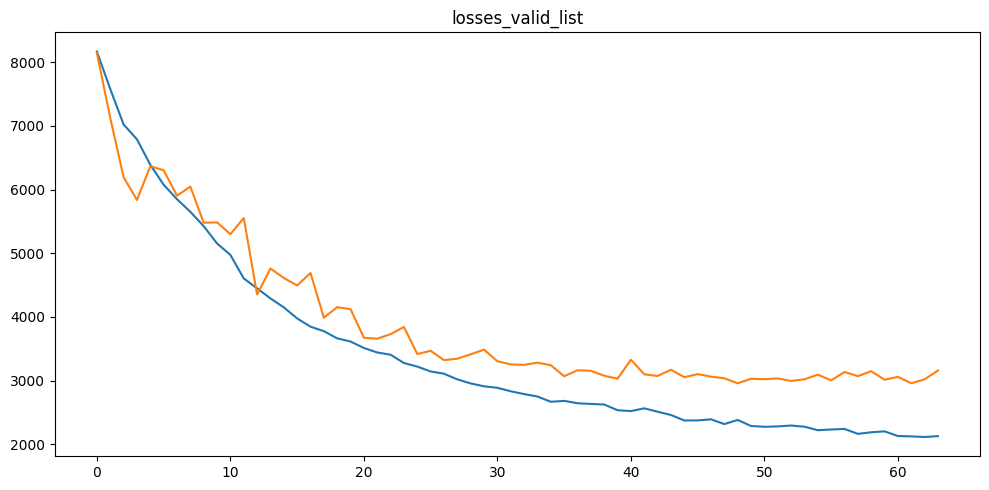

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ]
# Loop through each subplot

loss_pair = loss_pairs[0]
for loss in loss_pair:
    ax.plot(losses.__dict__[loss])
    ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Data preprocessing: 100%|██████████| 1/1 [00:08<00:00,  8.60s/it]


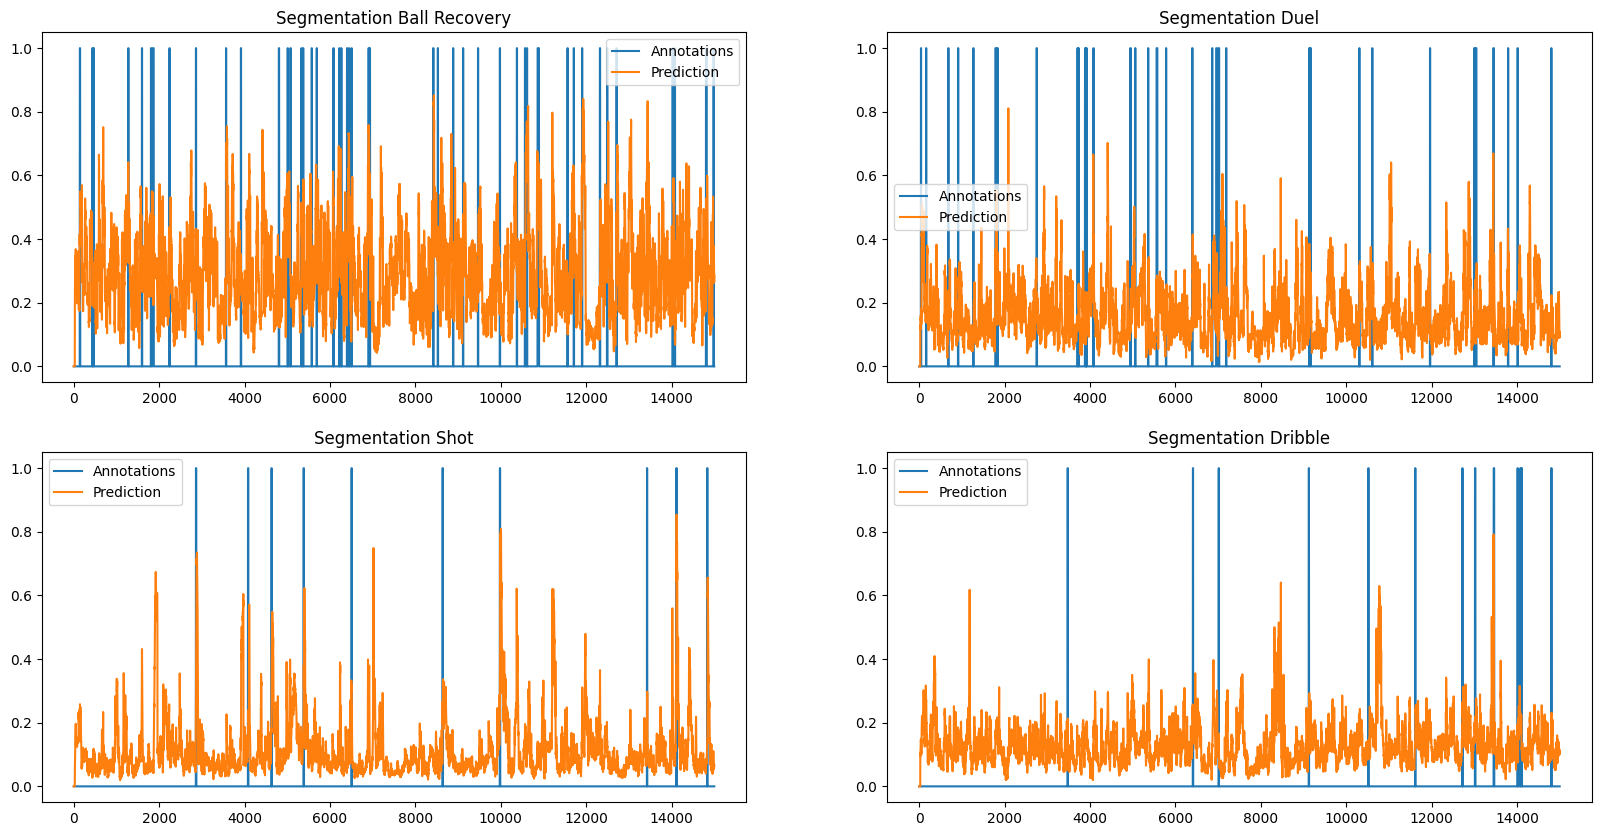

In [10]:
args = Args
collate_fn = collateVisGCN
model_path = "models/detector2.pth.tar"
model = torch.load(model_path)
visualiser = Visualiser(collate_fn, args, model, smooth_rate=None, val=True)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation=None)

Data preprocessing: 100%|██████████| 1/1 [00:08<00:00,  8.38s/it]


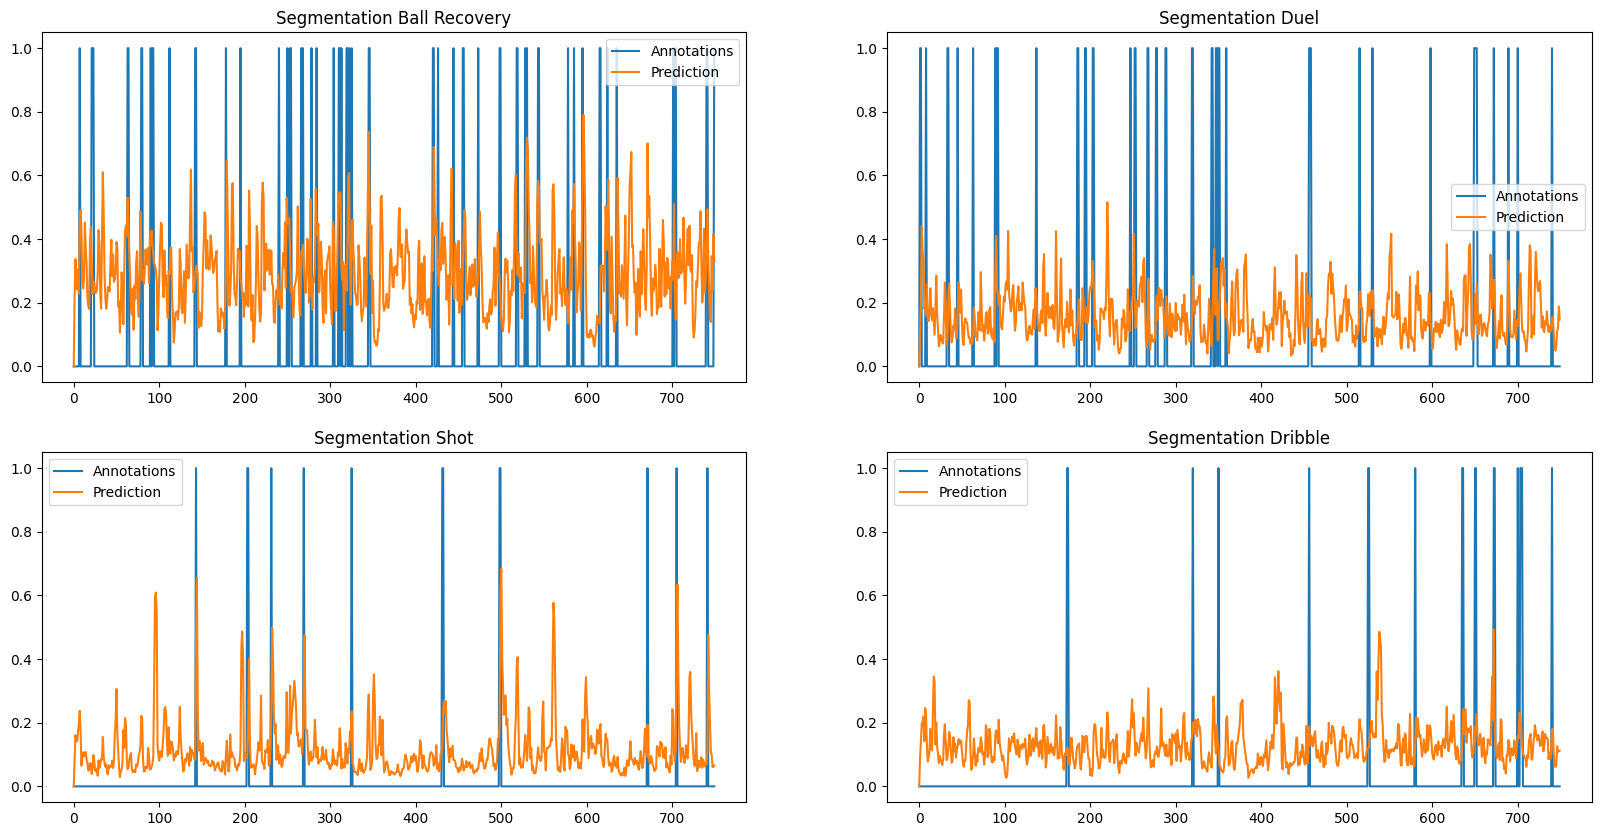

In [12]:
args = Args
collate_fn = collateVisGCN
model_path = "models/detector2.pth.tar"
model = torch.load(model_path)
visualiser = Visualiser(collate_fn, args, model, smooth_rate=20, val=True)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation=None)

# MODEL3 - More Annotations

In [3]:
@dataclass
class Args:
    receptive_field = 10
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.0
    loss_weight_detection=0.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 8

In [3]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency,
                    save_dir="models/detector3.pth.tar")

with open('results/detector3_results.pkl', 'wb') as file:
    pickle.dump(losses, file)

Get labels & features: 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]
Train 1: Time 2.916s (it:3.073s) Data:0.545s (it:0.473s) Loss 3.0845e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:46<00:00,  2.92s/it]
Evaluate 1: Time 1.631s (it:1.344s) Data:0.527s (it:0.452s) Loss 2.6764e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:32<00:00,  1.63s/it]
Train 2: Time 2.824s (it:2.516s) Data:0.552s (it:0.494s) Loss 2.8499e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:40<00:00,  2.82s/it]
Evaluate 2: Time 1.650s (it:1.595s) Data:0.549s (it:0.462s) Loss 3.0851e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:34<00:00,  1.65s/it]
Train 3: Time 2.973s (it:2.923s) Data:0.559s (it:0.520s) Loss 2.6295e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:49<00:00,  2.97s/it]
Evaluate 3: Time 1.832s (it:1.519s) Data:0.558s (it:0.455s) Loss 3.1437e+04 : 100%|███████████████████████████████████████████

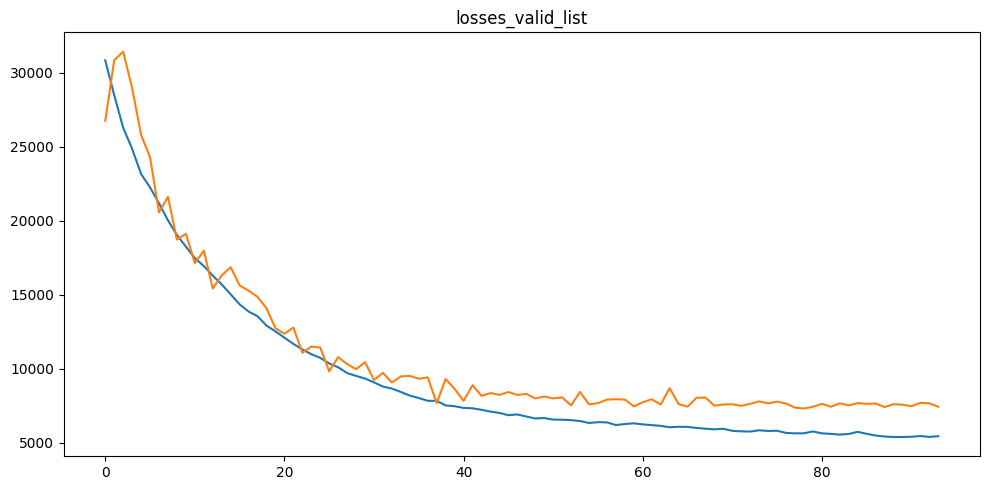

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ]
# Loop through each subplot

loss_pair = loss_pairs[0]
for loss in loss_pair:
    ax.plot(losses.__dict__[loss])
    ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Data preprocessing: 100%|██████████| 1/1 [00:08<00:00,  8.50s/it]


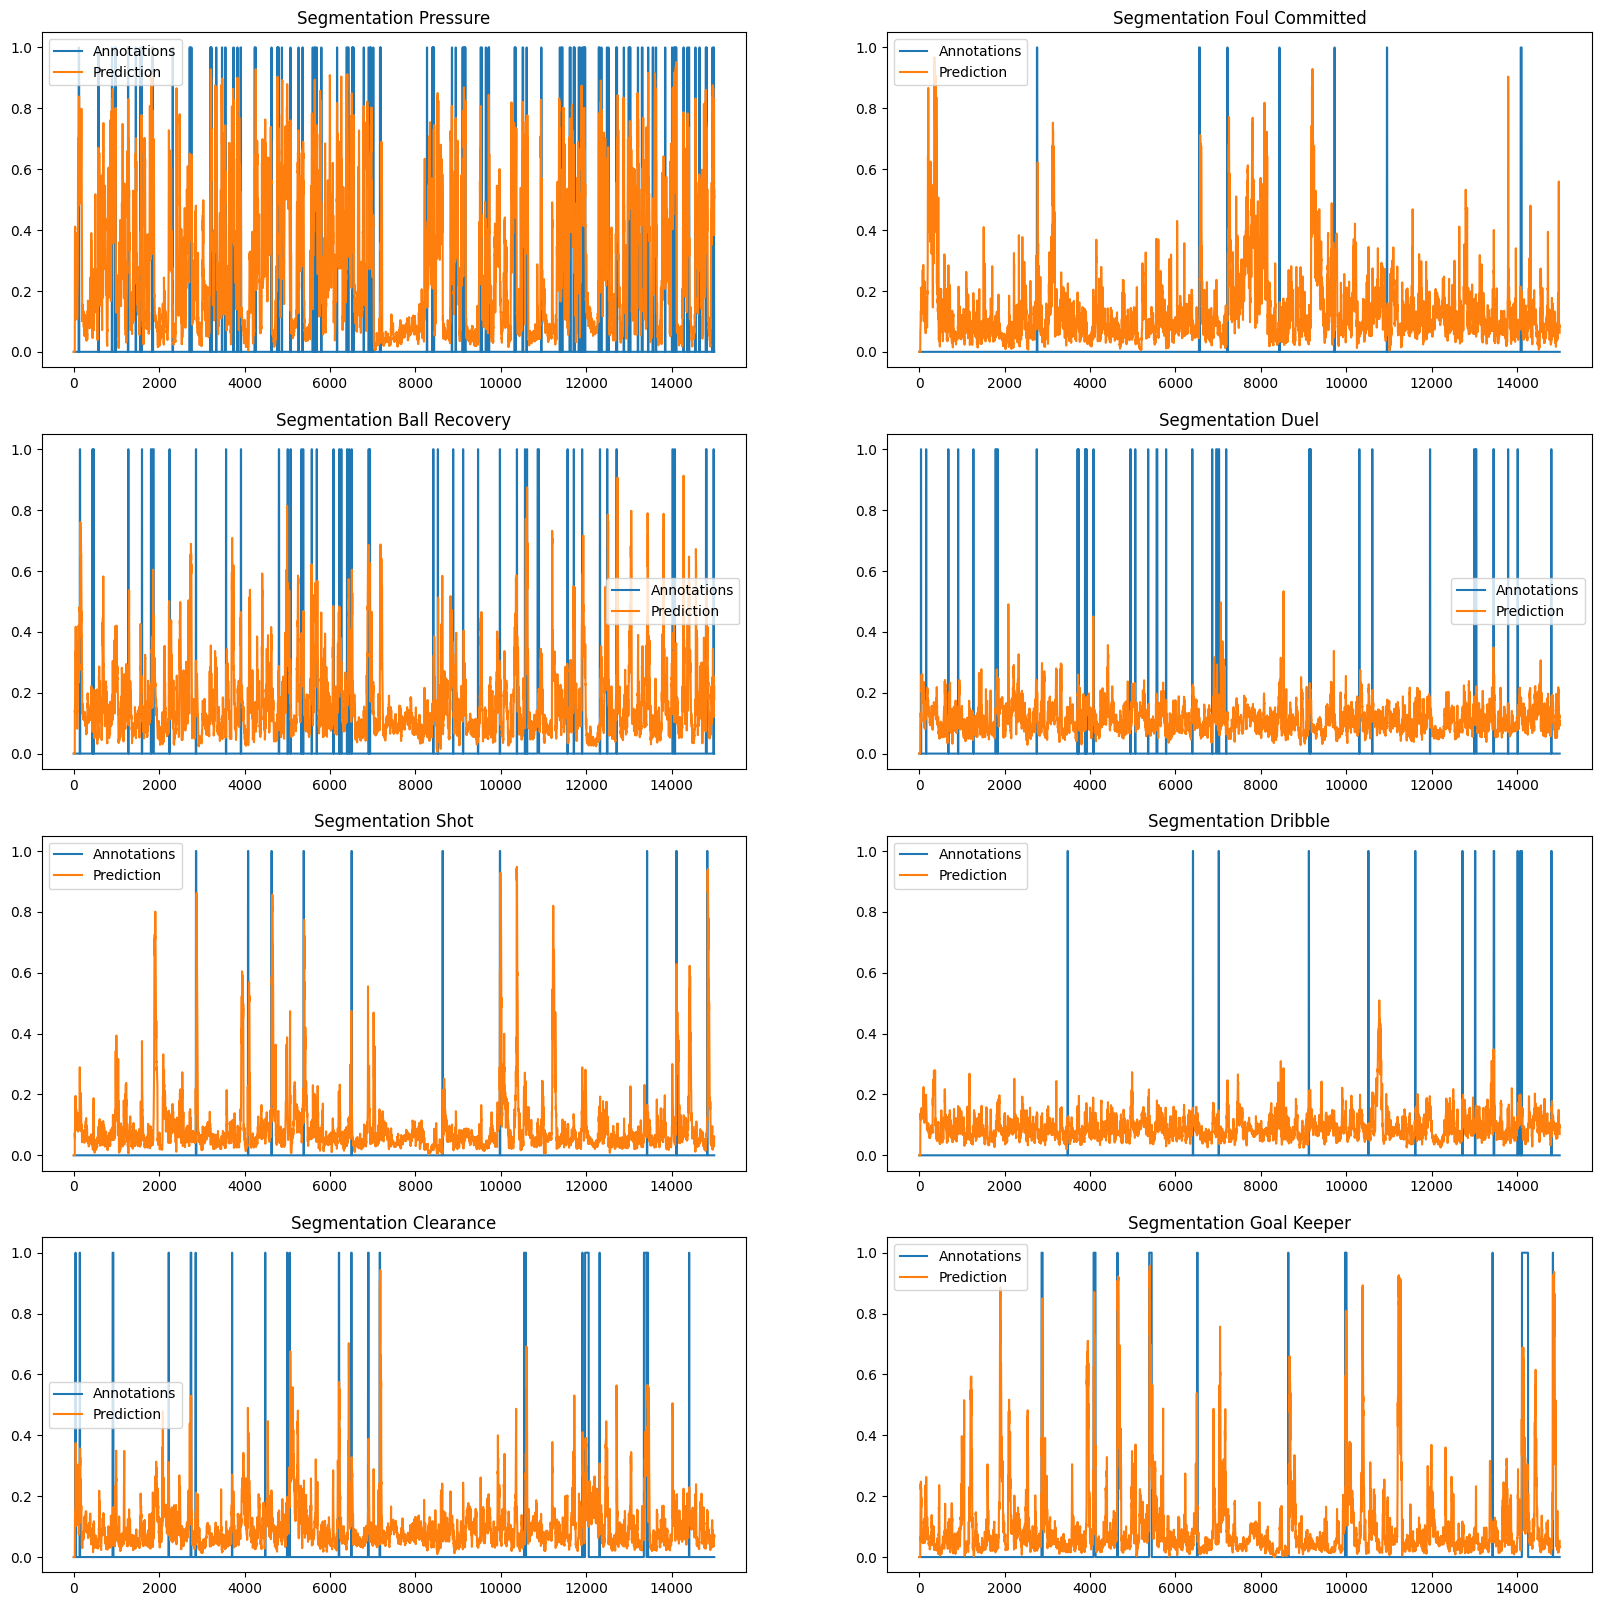

In [3]:
args = Args
collate_fn = collateVisGCN
model_path = "models/detector3.pth.tar"
model = torch.load(model_path)
visualiser = Visualiser(collate_fn, args, model, smooth_rate=None, val=True)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation=None)

Data preprocessing: 100%|██████████| 1/1 [00:09<00:00,  9.49s/it]


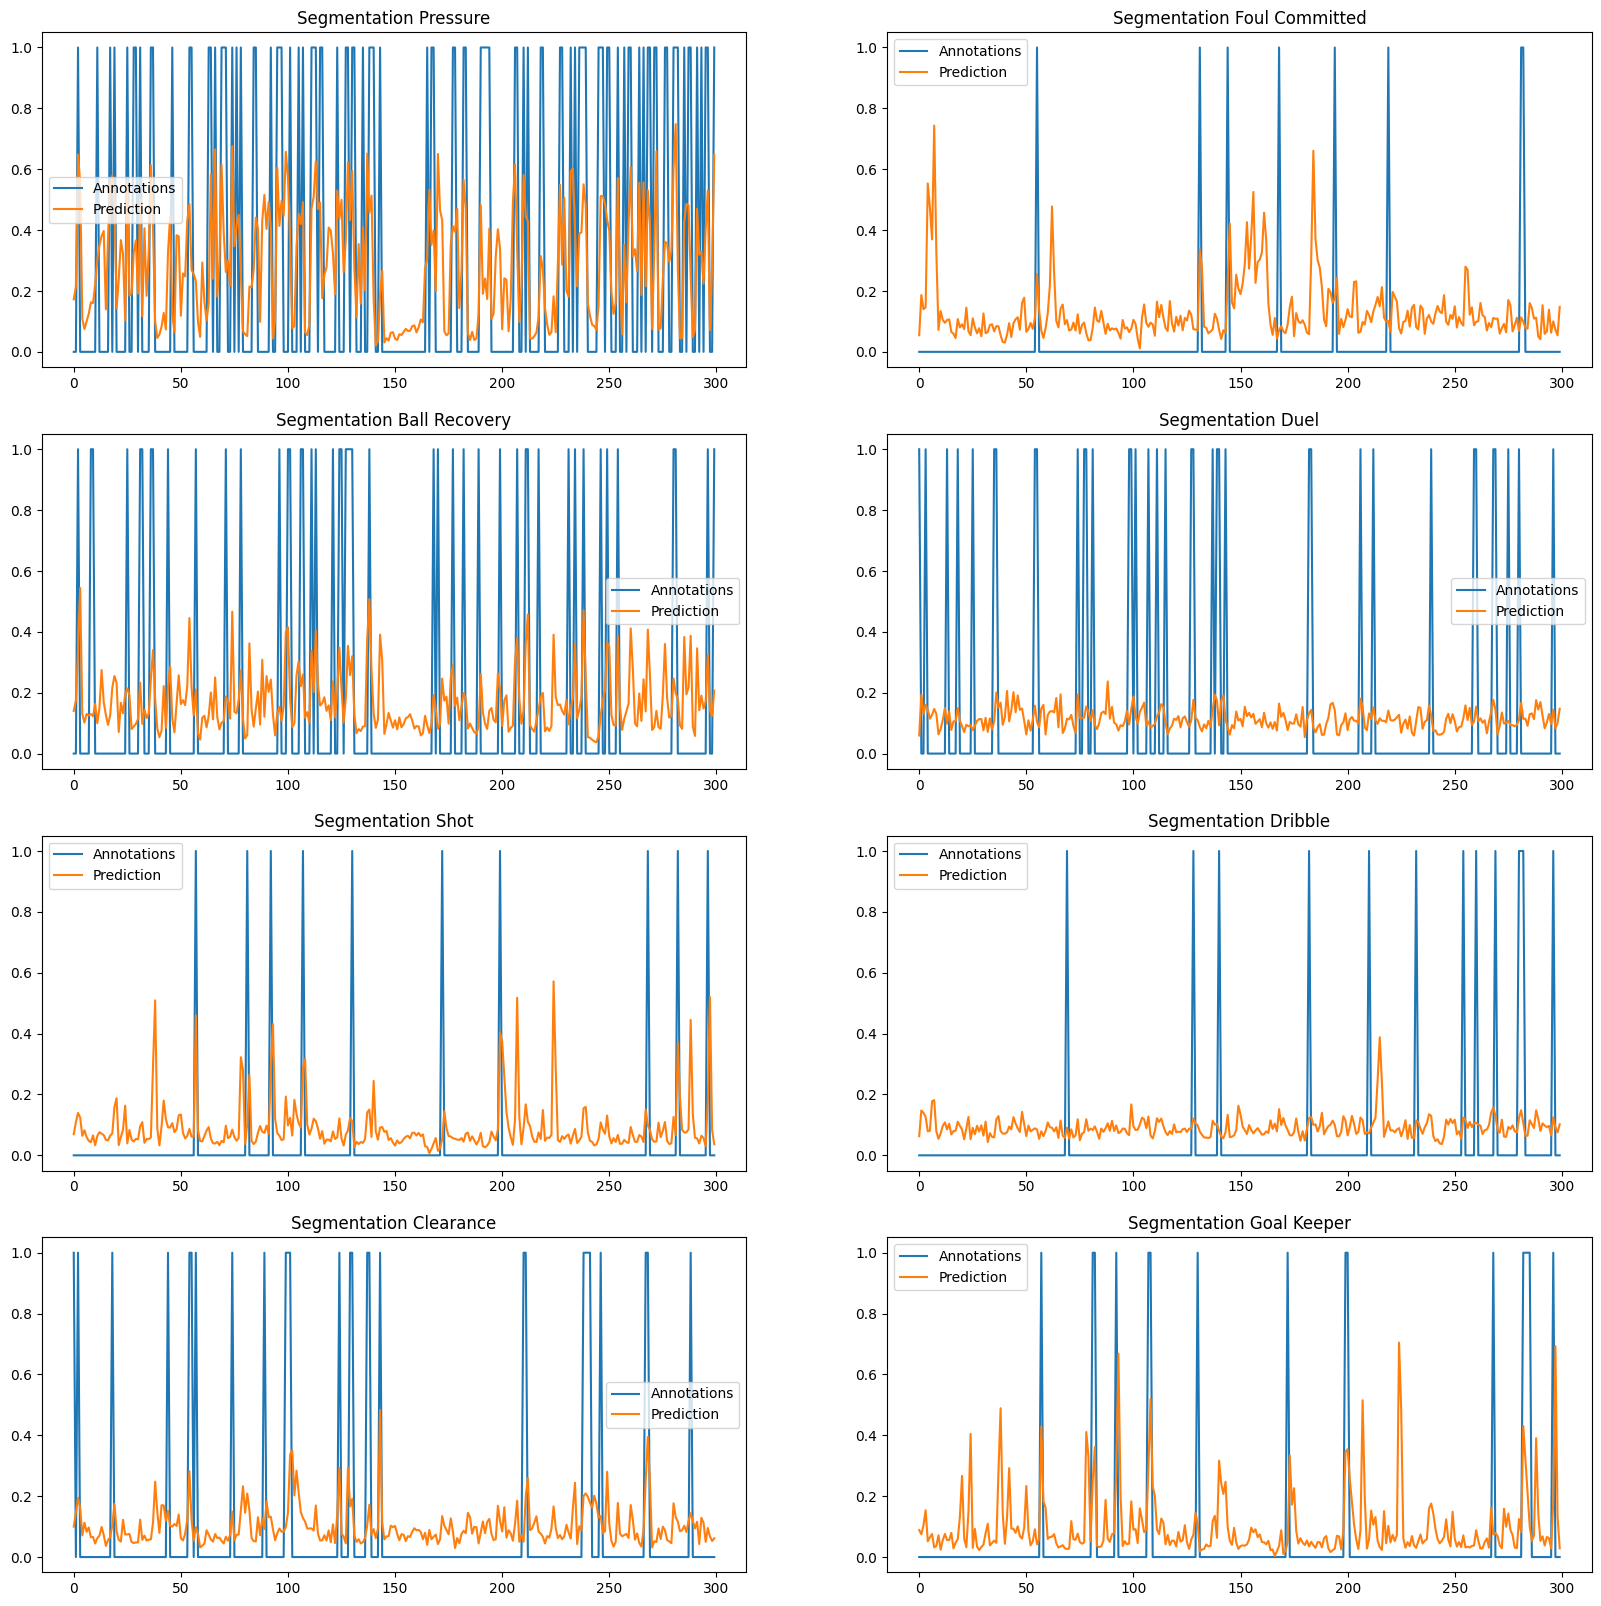

In [15]:
# visualiser = Visualiser(collate_fn, args, model, smooth_rate=50, val=True)
# visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation=None)

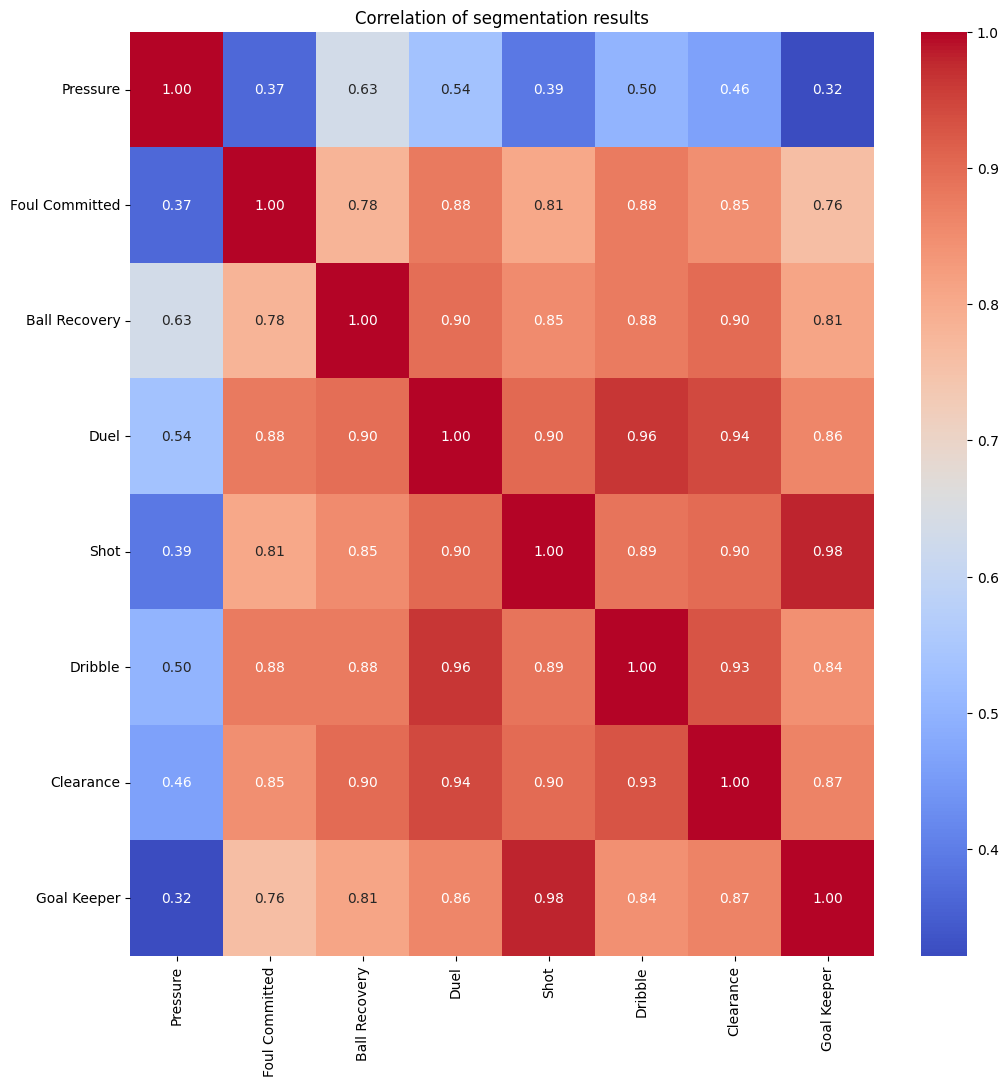

In [50]:

plt.figure(figsize=(12, 12))
plt.title("Correlation of segmentation results")
ax = sns.heatmap(np.corrcoef(visualiser.segmentation.T), annot=True, cmap="coolwarm", fmt=".2f", xticklabels=True, yticklabels=True)
ax.set_xticklabels(list(event_enc.keys()), rotation=90)
ax.set_yticklabels(list(event_enc.keys()), rotation=0)
plt.show()

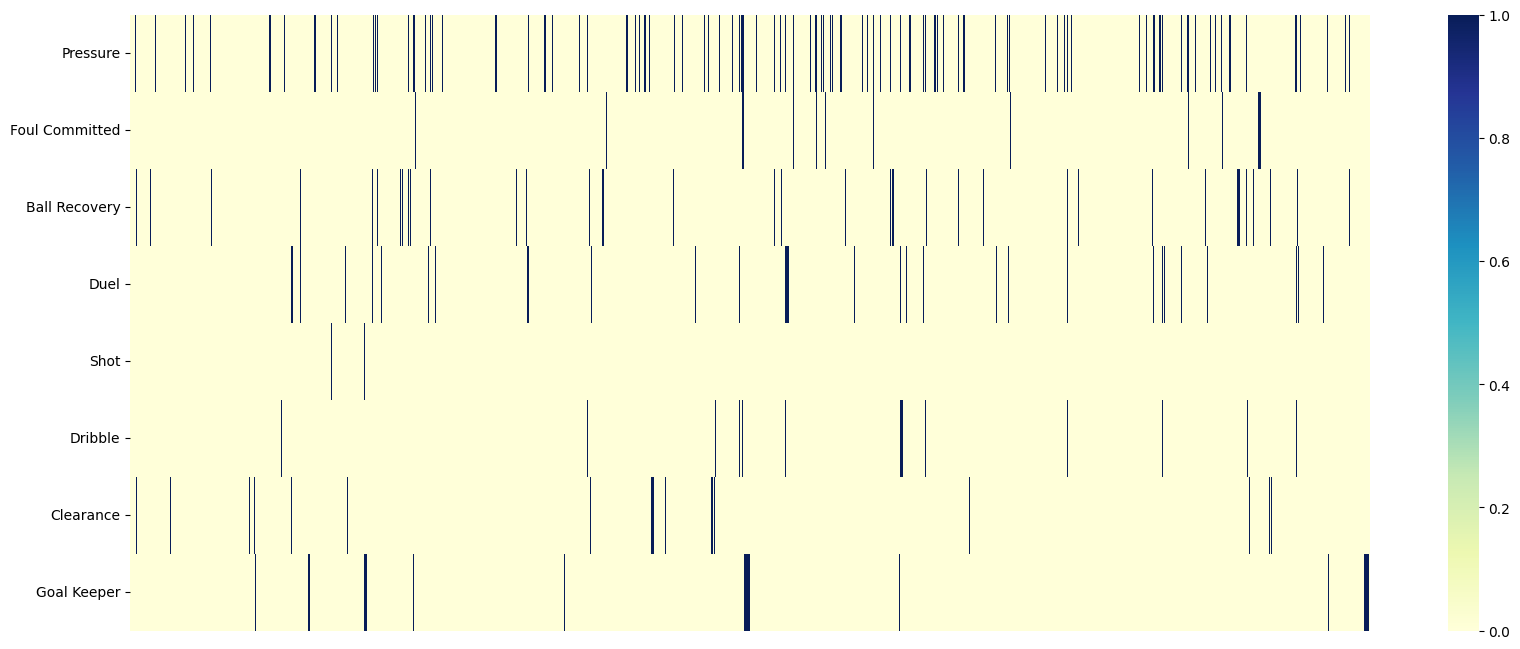

In [55]:
plt.figure(figsize=(20, 8))
ax = sns.heatmap(visualiser.annotations.T, cmap="YlGnBu", annot=False, fmt=".2f")
ax.set_xticks([])
ax.set_yticklabels(list(event_enc.keys()),rotation=0)

plt.show()

# Model with edge weights

In [2]:
@dataclass
class Args:
    receptive_field = 6
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 30
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.0
    loss_weight_detection=0.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 8
    K_parameters = get_K_params(chunk_size)

In [3]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency,
                    save_dir=f"models/detector_edge_weights.pth.tar")

with open(f'results/detector_edge_weights_results.pkl', 'wb') as file:
    pickle.dump(losses, file)

Get labels & features: 100%|██████████| 2/2 [00:11<00:00,  5.74s/it]
Train 1: Time 2.662s (it:2.608s) Data:0.353s (it:0.324s) Loss 1.5630e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:31<00:00,  2.66s/it]
Evaluate 1: Time 1.326s (it:1.359s) Data:0.328s (it:0.300s) Loss 1.9268e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:15<00:00,  1.33s/it]
Train 2: Time 2.581s (it:2.454s) Data:0.348s (it:0.312s) Loss 1.4364e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:27<00:00,  2.58s/it]
Evaluate 2: Time 1.277s (it:1.269s) Data:0.322s (it:0.302s) Loss 1.3453e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:12<00:00,  1.28s/it]
Train 3: Time 2.539s (it:2.426s) Data:0.335s (it:0.314s) Loss 1.3622e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:24<00:00,  2.54s/it]
Evaluate 3: Time 1.322s (it:1.383s) Data:0.334s (it:0.309s) Loss 1.1361e+04 : 100%|███████████████████████████████████████████

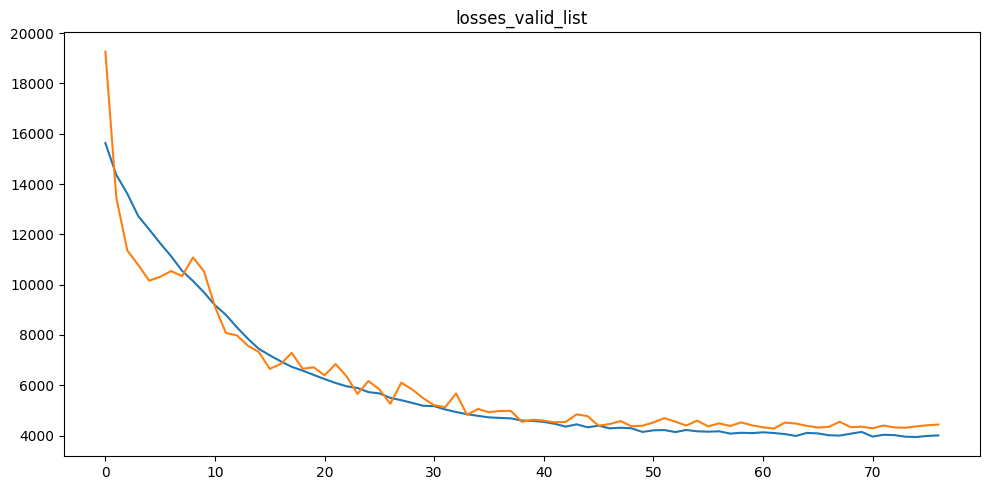

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ]
# Loop through each subplot

loss_pair = loss_pairs[0]
for loss in loss_pair:
    ax.plot(losses.__dict__[loss])
    ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Data preprocessing: 100%|██████████| 1/1 [00:08<00:00,  8.32s/it]


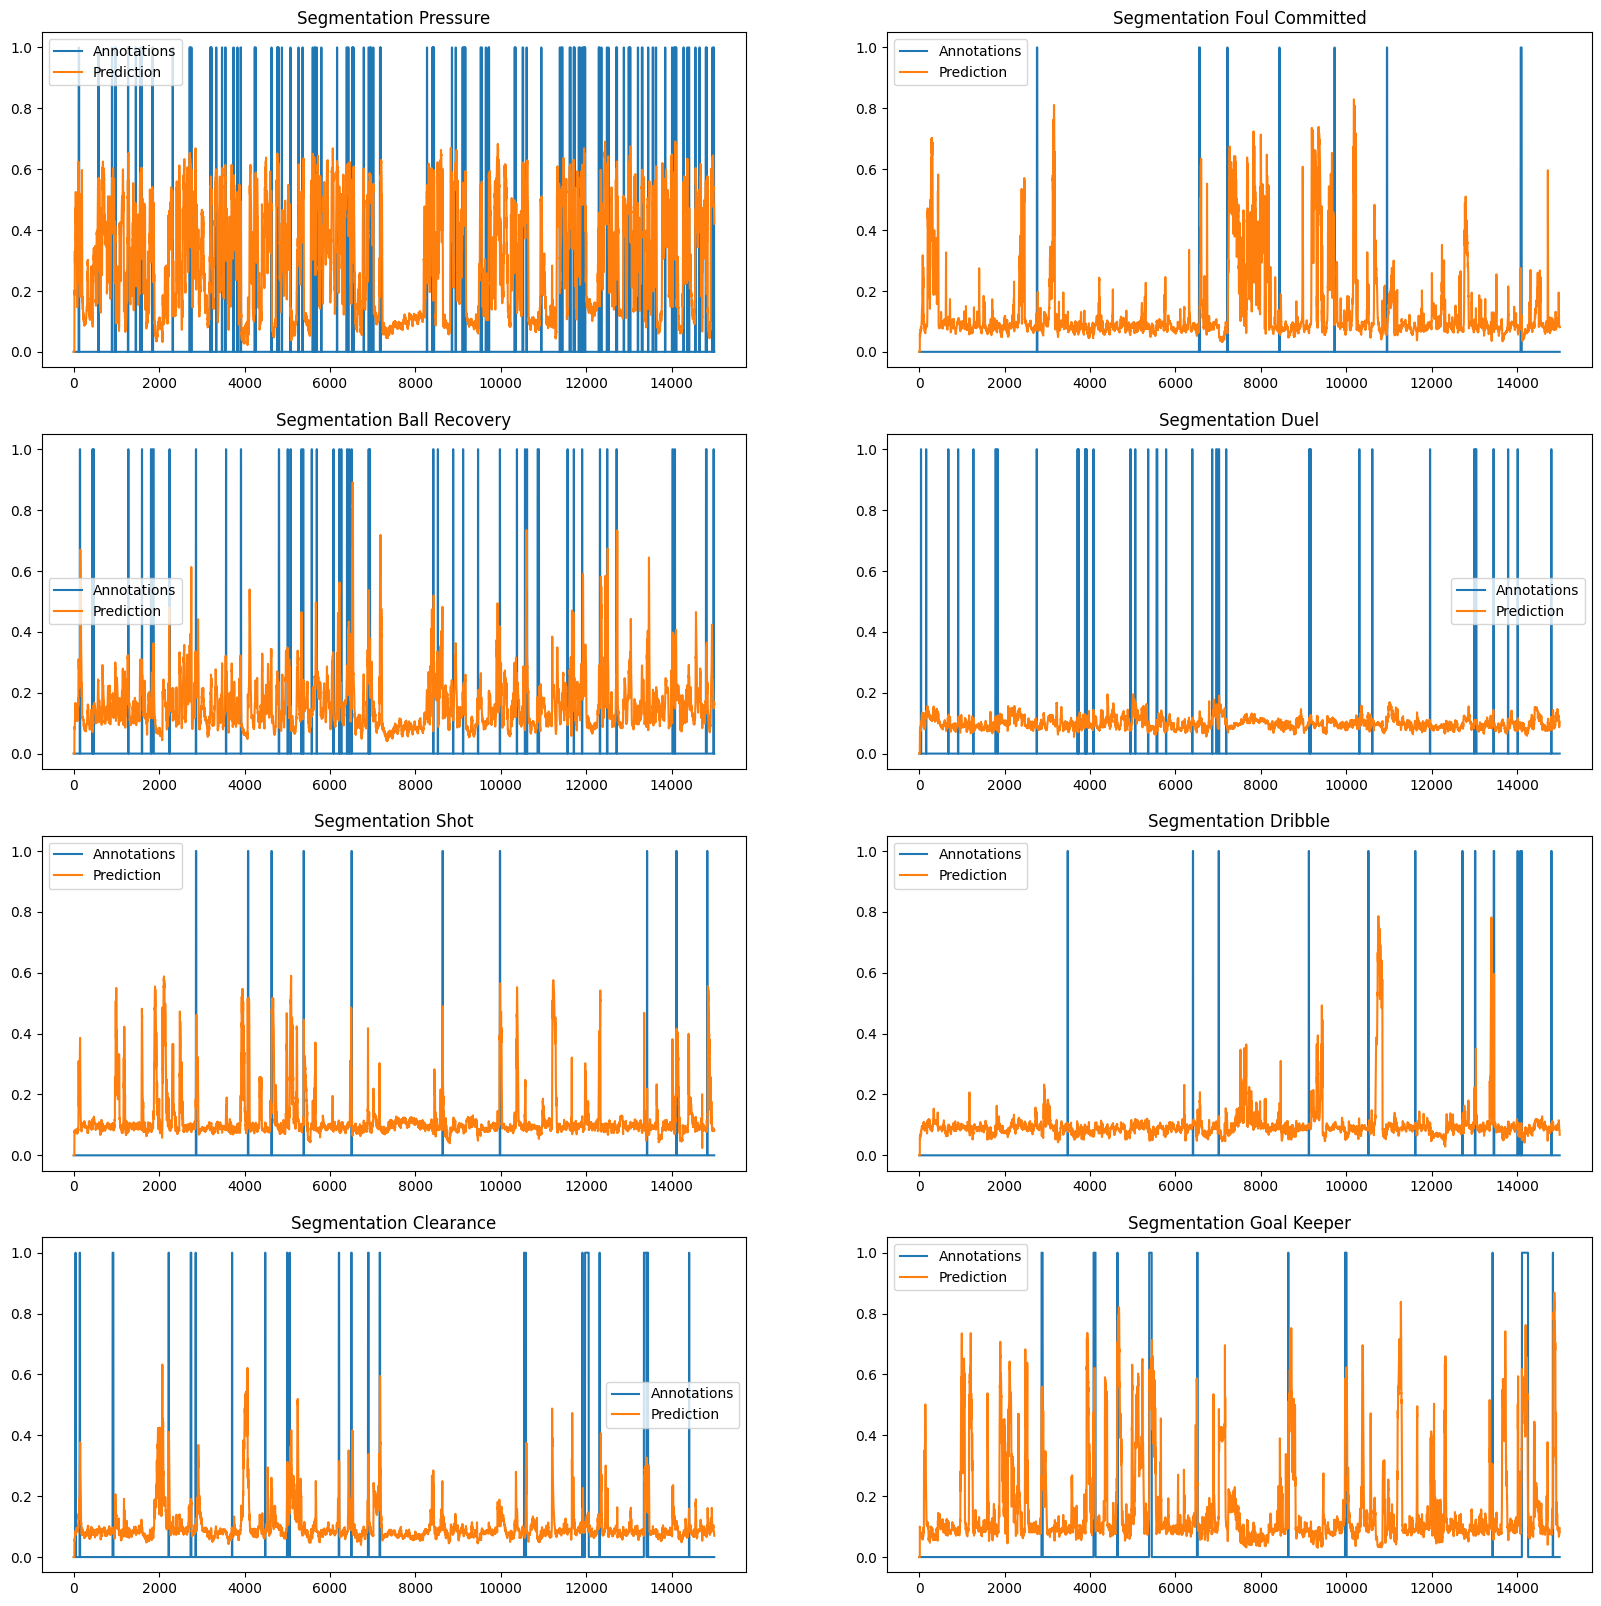

In [5]:
args = Args
collate_fn = collateVisGCN
model_path = "models/detector_edge_weights.pth.tar"
model = torch.load(model_path)
visualiser = Visualiser(collate_fn, args, model, smooth_rate=None, val=True)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation=None)

In [6]:
visualiser.calculate_MAP()

array([0.07965352, 0.22350829, 0.01602186, 0.06342745, 0.0347834 ,
       0.02474524, 0.0227964 , 0.0652302 , 0.18671528])

# Model for Duel

In [2]:
@dataclass
class Args:
    receptive_field = 6
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 30
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.0
    loss_weight_detection=0.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 1
    K_parameters = get_K_params(chunk_size)
    focused_annotation = "Duel"

In [4]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency,
                    save_dir=f"models/detector_duel.pth.tar")

with open(f'results/detector_duel.pkl', 'wb') as file:
    pickle.dump(losses, file)

Train 1: Time 2.499s (it:2.448s) Data:0.332s (it:0.302s) Loss 9.3502e+03 : 100%|████████████████████████████████████████████████| 57/57 [02:22<00:00,  2.50s/it]
Evaluate 1: Time 1.294s (it:1.254s) Data:0.331s (it:0.301s) Loss 1.3604e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:13<00:00,  1.29s/it]
Train 2: Time 2.683s (it:2.656s) Data:0.343s (it:0.320s) Loss 9.0891e+03 : 100%|████████████████████████████████████████████████| 57/57 [02:32<00:00,  2.68s/it]
Evaluate 2: Time 1.376s (it:1.699s) Data:0.338s (it:0.699s) Loss 9.2280e+03 : 100%|█████████████████████████████████████████████| 57/57 [01:18<00:00,  1.38s/it]
Train 3: Time 2.513s (it:2.423s) Data:0.332s (it:0.309s) Loss 9.0055e+03 : 100%|████████████████████████████████████████████████| 57/57 [02:23<00:00,  2.51s/it]
Evaluate 3: Time 1.238s (it:1.218s) Data:0.320s (it:0.303s) Loss 1.0104e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:10<00:00,  1.24s/it]
Train 4: Time 2.425s (it:2.392s) D

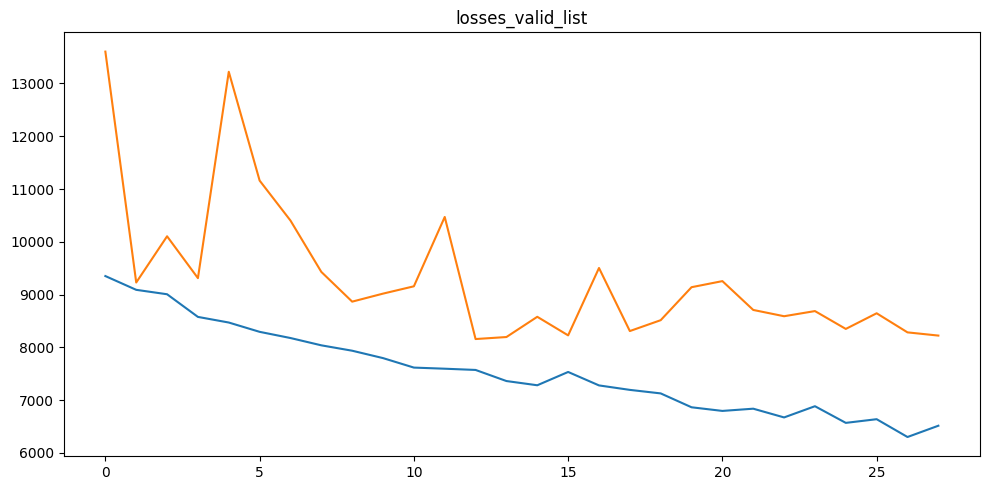

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ]
# Loop through each subplot

loss_pair = loss_pairs[0]
for loss in loss_pair:
    ax.plot(losses.__dict__[loss])
    ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Data preprocessing: 100%|██████████| 1/1 [00:08<00:00,  8.38s/it]


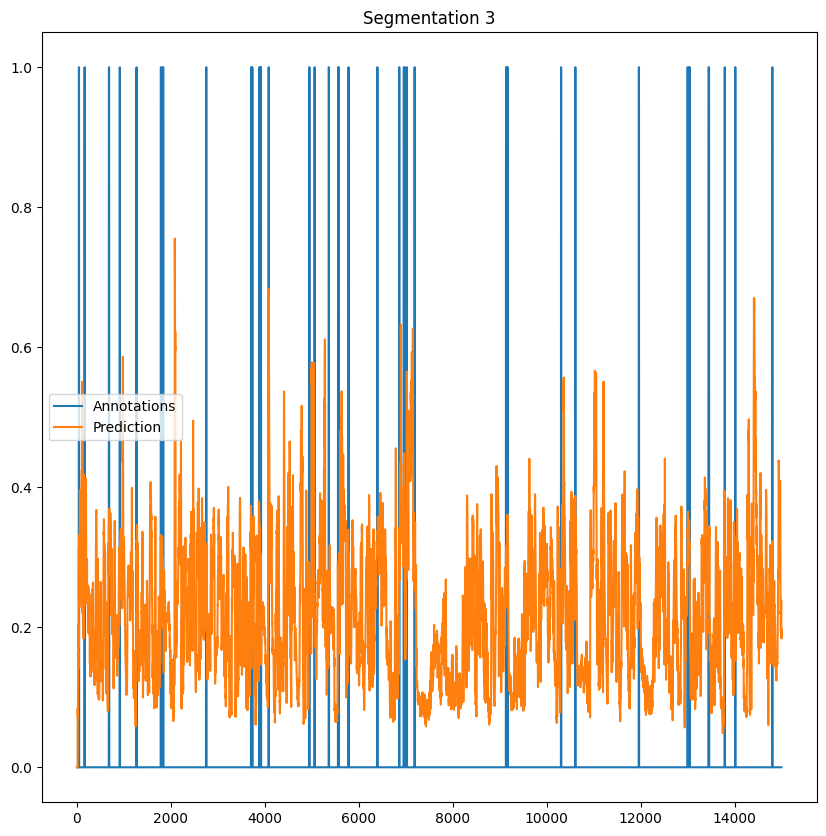

In [4]:
args = Args
collate_fn = collateVisGCN
model_path = "models/detector_duel.pth.tar"
model = torch.load(model_path)
visualiser = Visualiser(collate_fn, args, model, smooth_rate=None, val=True, ann=8)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation="Duel")

In [17]:
from sklearn.metrics import average_precision_score

average_precision_score(visualiser.annotations[:,event_enc["Duel"]], visualiser.segmentation[:28575,0], average='macro')

0.04362075292030608

# Model each annotation separetly

In [25]:
@dataclass
class Args:
    receptive_field = 6
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 30
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.0
    loss_weight_detection=0.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 1
    K_parameters = get_K_params(chunk_size)
    focused_annotation = "Duel"

In [26]:
args = Args
collate_fn = collateGCN
list_anns = list(event_enc.keys())
list_anns.pop(3)

for ann in list_anns:
    print(f"\n {ann}")
    args.focused_annotation = ann

    train_dataset = CALFData(split="train", args=args)
    validation_dataset = CALFData(split="validate", args=args)

    train_loader = torch.utils.data.DataLoader(train_dataset,
                batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

    validate_loader = torch.utils.data.DataLoader(validation_dataset,
                batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

    model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
    criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
    criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
    optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                                betas=(0.9, 0.999), eps=1e-07, 
                                weight_decay=0, amsgrad=False)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

    losses = trainer(train_loader, validate_loader,
                        model, optimizer, scheduler, 
                        [criterion_segmentation, criterion_spotting], 
                        [args.loss_weight_segmentation, args.loss_weight_detection],
                        model_name=args.model_name,
                        max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency,
                        save_dir=f"models/detector_{ann}.pth.tar")

    with open(f'results/detector_{ann}.pkl', 'wb') as file:
        pickle.dump(losses, file)


 Pressure


Get labels & features: 100%|██████████| 2/2 [00:10<00:00,  5.13s/it]
Train 1: Time 2.749s (it:2.508s) Data:0.350s (it:0.318s) Loss 8.1303e+03 : 100%|████████████████████████████████████████████████| 57/57 [02:36<00:00,  2.75s/it]
Evaluate 1: Time 1.334s (it:1.208s) Data:0.354s (it:0.317s) Loss 2.2490e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:16<00:00,  1.33s/it]
Train 2: Time 2.638s (it:2.517s) Data:0.348s (it:0.316s) Loss 7.9468e+03 : 100%|████████████████████████████████████████████████| 57/57 [02:30<00:00,  2.64s/it]
Evaluate 2: Time 1.275s (it:1.123s) Data:0.342s (it:0.310s) Loss 1.5231e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:12<00:00,  1.27s/it]
Train 3: Time 2.576s (it:2.346s) Data:0.354s (it:0.316s) Loss 7.7888e+03 : 100%|████████████████████████████████████████████████| 57/57 [02:26<00:00,  2.58s/it]
Evaluate 3: Time 1.270s (it:1.176s) Data:0.341s (it:0.304s) Loss 2.0936e+04 : 100%|███████████████████████████████████████████


 Foul Committed


Get labels & features: 100%|██████████| 2/2 [00:09<00:00,  4.80s/it]
Train 1: Time 2.639s (it:2.665s) Data:0.341s (it:0.330s) Loss 1.1766e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:30<00:00,  2.64s/it]
Evaluate 1: Time 1.234s (it:1.129s) Data:0.337s (it:0.339s) Loss 2.1274e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:10<00:00,  1.23s/it]
Train 2: Time 2.662s (it:4.885s) Data:0.348s (it:0.337s) Loss 1.1685e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:31<00:00,  2.66s/it]
Evaluate 2: Time 1.540s (it:1.202s) Data:0.352s (it:0.301s) Loss 1.4352e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:27<00:00,  1.54s/it]
Train 3: Time 2.875s (it:3.038s) Data:0.349s (it:0.316s) Loss 1.1396e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:43<00:00,  2.88s/it]
Evaluate 3: Time 1.619s (it:1.274s) Data:0.374s (it:0.311s) Loss 1.4219e+04 : 100%|███████████████████████████████████████████


 Ball Recovery


Get labels & features: 100%|██████████| 2/2 [00:09<00:00,  4.90s/it]
Train 1: Time 2.714s (it:2.750s) Data:0.351s (it:0.320s) Loss 1.0734e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:34<00:00,  2.71s/it]
Evaluate 1: Time 1.397s (it:1.378s) Data:0.342s (it:0.316s) Loss 1.3037e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:19<00:00,  1.40s/it]
Train 2: Time 2.763s (it:2.403s) Data:0.360s (it:0.316s) Loss 1.0280e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:37<00:00,  2.76s/it]
Evaluate 2: Time 1.386s (it:1.300s) Data:0.343s (it:0.318s) Loss 1.1085e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:19<00:00,  1.39s/it]
Train 3: Time 3.161s (it:2.519s) Data:0.395s (it:0.319s) Loss 1.0067e+04 : 100%|████████████████████████████████████████████████| 57/57 [03:00<00:00,  3.16s/it]
Evaluate 3: Time 1.354s (it:1.281s) Data:0.335s (it:0.310s) Loss 1.1486e+04 : 100%|███████████████████████████████████████████


 Shot


Get labels & features: 100%|██████████| 2/2 [00:10<00:00,  5.29s/it]
Train 1: Time 2.470s (it:2.423s) Data:0.329s (it:0.307s) Loss 1.1882e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:20<00:00,  2.47s/it]
Evaluate 1: Time 1.173s (it:1.198s) Data:0.339s (it:0.305s) Loss 1.3703e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:06<00:00,  1.17s/it]
Train 2: Time 2.554s (it:2.745s) Data:0.341s (it:0.336s) Loss 1.1016e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:25<00:00,  2.55s/it]
Evaluate 2: Time 1.441s (it:1.248s) Data:0.342s (it:0.310s) Loss 1.0897e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:22<00:00,  1.44s/it]
Train 3: Time 2.676s (it:2.619s) Data:0.356s (it:0.326s) Loss 1.0476e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:32<00:00,  2.68s/it]
Evaluate 3: Time 1.318s (it:1.319s) Data:0.341s (it:0.318s) Loss 9.8466e+03 : 100%|███████████████████████████████████████████


 Dribble


Get labels & features: 100%|██████████| 2/2 [00:09<00:00,  4.84s/it]
Train 1: Time 2.403s (it:2.411s) Data:0.327s (it:0.305s) Loss 1.1625e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:16<00:00,  2.40s/it]
Evaluate 1: Time 1.113s (it:1.105s) Data:0.322s (it:0.300s) Loss 1.3820e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:03<00:00,  1.11s/it]
Train 2: Time 2.398s (it:2.447s) Data:0.326s (it:0.305s) Loss 1.0743e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:16<00:00,  2.40s/it]
Evaluate 2: Time 1.136s (it:1.107s) Data:0.329s (it:0.302s) Loss 1.4755e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:04<00:00,  1.14s/it]
Train 3: Time 2.404s (it:2.382s) Data:0.326s (it:0.314s) Loss 9.9088e+03 : 100%|████████████████████████████████████████████████| 57/57 [02:17<00:00,  2.40s/it]
Evaluate 3: Time 1.110s (it:1.131s) Data:0.323s (it:0.304s) Loss 1.2011e+04 : 100%|███████████████████████████████████████████


 Clearance


Get labels & features: 100%|██████████| 2/2 [00:09<00:00,  4.84s/it]
Train 1: Time 2.434s (it:2.421s) Data:0.331s (it:0.311s) Loss 1.1873e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:18<00:00,  2.43s/it]
Evaluate 1: Time 1.121s (it:1.068s) Data:0.322s (it:0.297s) Loss 1.5849e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:03<00:00,  1.12s/it]
Train 2: Time 2.412s (it:2.394s) Data:0.329s (it:0.304s) Loss 1.1538e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:17<00:00,  2.41s/it]
Evaluate 2: Time 1.142s (it:1.113s) Data:0.333s (it:0.299s) Loss 1.3147e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:05<00:00,  1.14s/it]
Train 3: Time 2.421s (it:2.339s) Data:0.330s (it:0.303s) Loss 1.0809e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:18<00:00,  2.42s/it]
Evaluate 3: Time 1.131s (it:1.449s) Data:0.330s (it:0.650s) Loss 1.2236e+04 : 100%|███████████████████████████████████████████


 Goal Keeper


Get labels & features: 100%|██████████| 2/2 [00:09<00:00,  4.83s/it]
Train 1: Time 2.404s (it:2.335s) Data:0.328s (it:0.320s) Loss 1.1376e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:17<00:00,  2.40s/it]
Evaluate 1: Time 1.115s (it:1.092s) Data:0.329s (it:0.300s) Loss 1.8326e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:03<00:00,  1.11s/it]
Train 2: Time 2.622s (it:2.560s) Data:0.368s (it:0.349s) Loss 1.0766e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:29<00:00,  2.62s/it]
Evaluate 2: Time 1.207s (it:1.142s) Data:0.359s (it:0.316s) Loss 1.4894e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:08<00:00,  1.21s/it]
Train 3: Time 2.507s (it:2.427s) Data:0.354s (it:0.327s) Loss 1.0562e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:22<00:00,  2.51s/it]
Evaluate 3: Time 1.164s (it:1.111s) Data:0.343s (it:0.320s) Loss 1.5011e+04 : 100%|███████████████████████████████████████████

# Model with more fatures and edge weights

In [2]:
@dataclass
class Args:
    receptive_field = 6
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 30
    batch_size = 32
    input_channel = 13
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.0
    loss_weight_detection=0.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 10
    K_parameters = get_K_params(chunk_size)
    focused_annotation = None
    generate_augmented_data = True

In [4]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency,
                    save_dir=f"models/detector_extended.pth.tar")

with open(f'results/detector_extended.pkl', 'wb') as file:
    pickle.dump(losses, file)

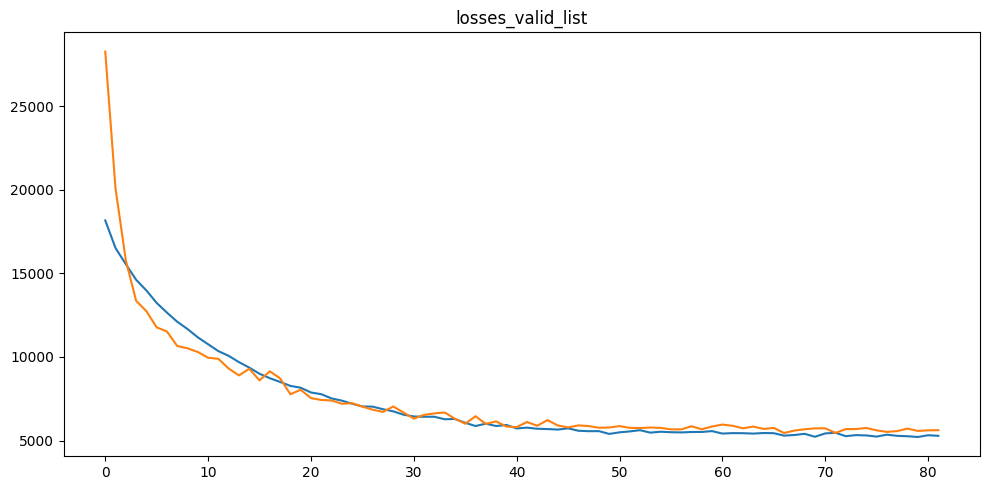

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ]
# Loop through each subplot

loss_pair = loss_pairs[0]
for loss in loss_pair:
    ax.plot(losses.__dict__[loss])
    ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Data preprocessing: 100%|██████████| 1/1 [00:10<00:00, 10.90s/it]


(<Figure size 2000x2500 with 10 Axes>,
 array([[<Axes: title={'center': 'Segmentation Pressure'}>,
         <Axes: title={'center': 'Segmentation Foul Committed'}>],
        [<Axes: title={'center': 'Segmentation Ball Recovery'}>,
         <Axes: title={'center': 'Segmentation Duel'}>],
        [<Axes: title={'center': 'Segmentation Shot'}>,
         <Axes: title={'center': 'Segmentation Dribble'}>],
        [<Axes: title={'center': 'Segmentation Clearance'}>,
         <Axes: title={'center': 'Segmentation Goal Keeper'}>],
        [<Axes: title={'center': 'Segmentation Pass'}>,
         <Axes: title={'center': 'Segmentation Dead'}>]], dtype=object))

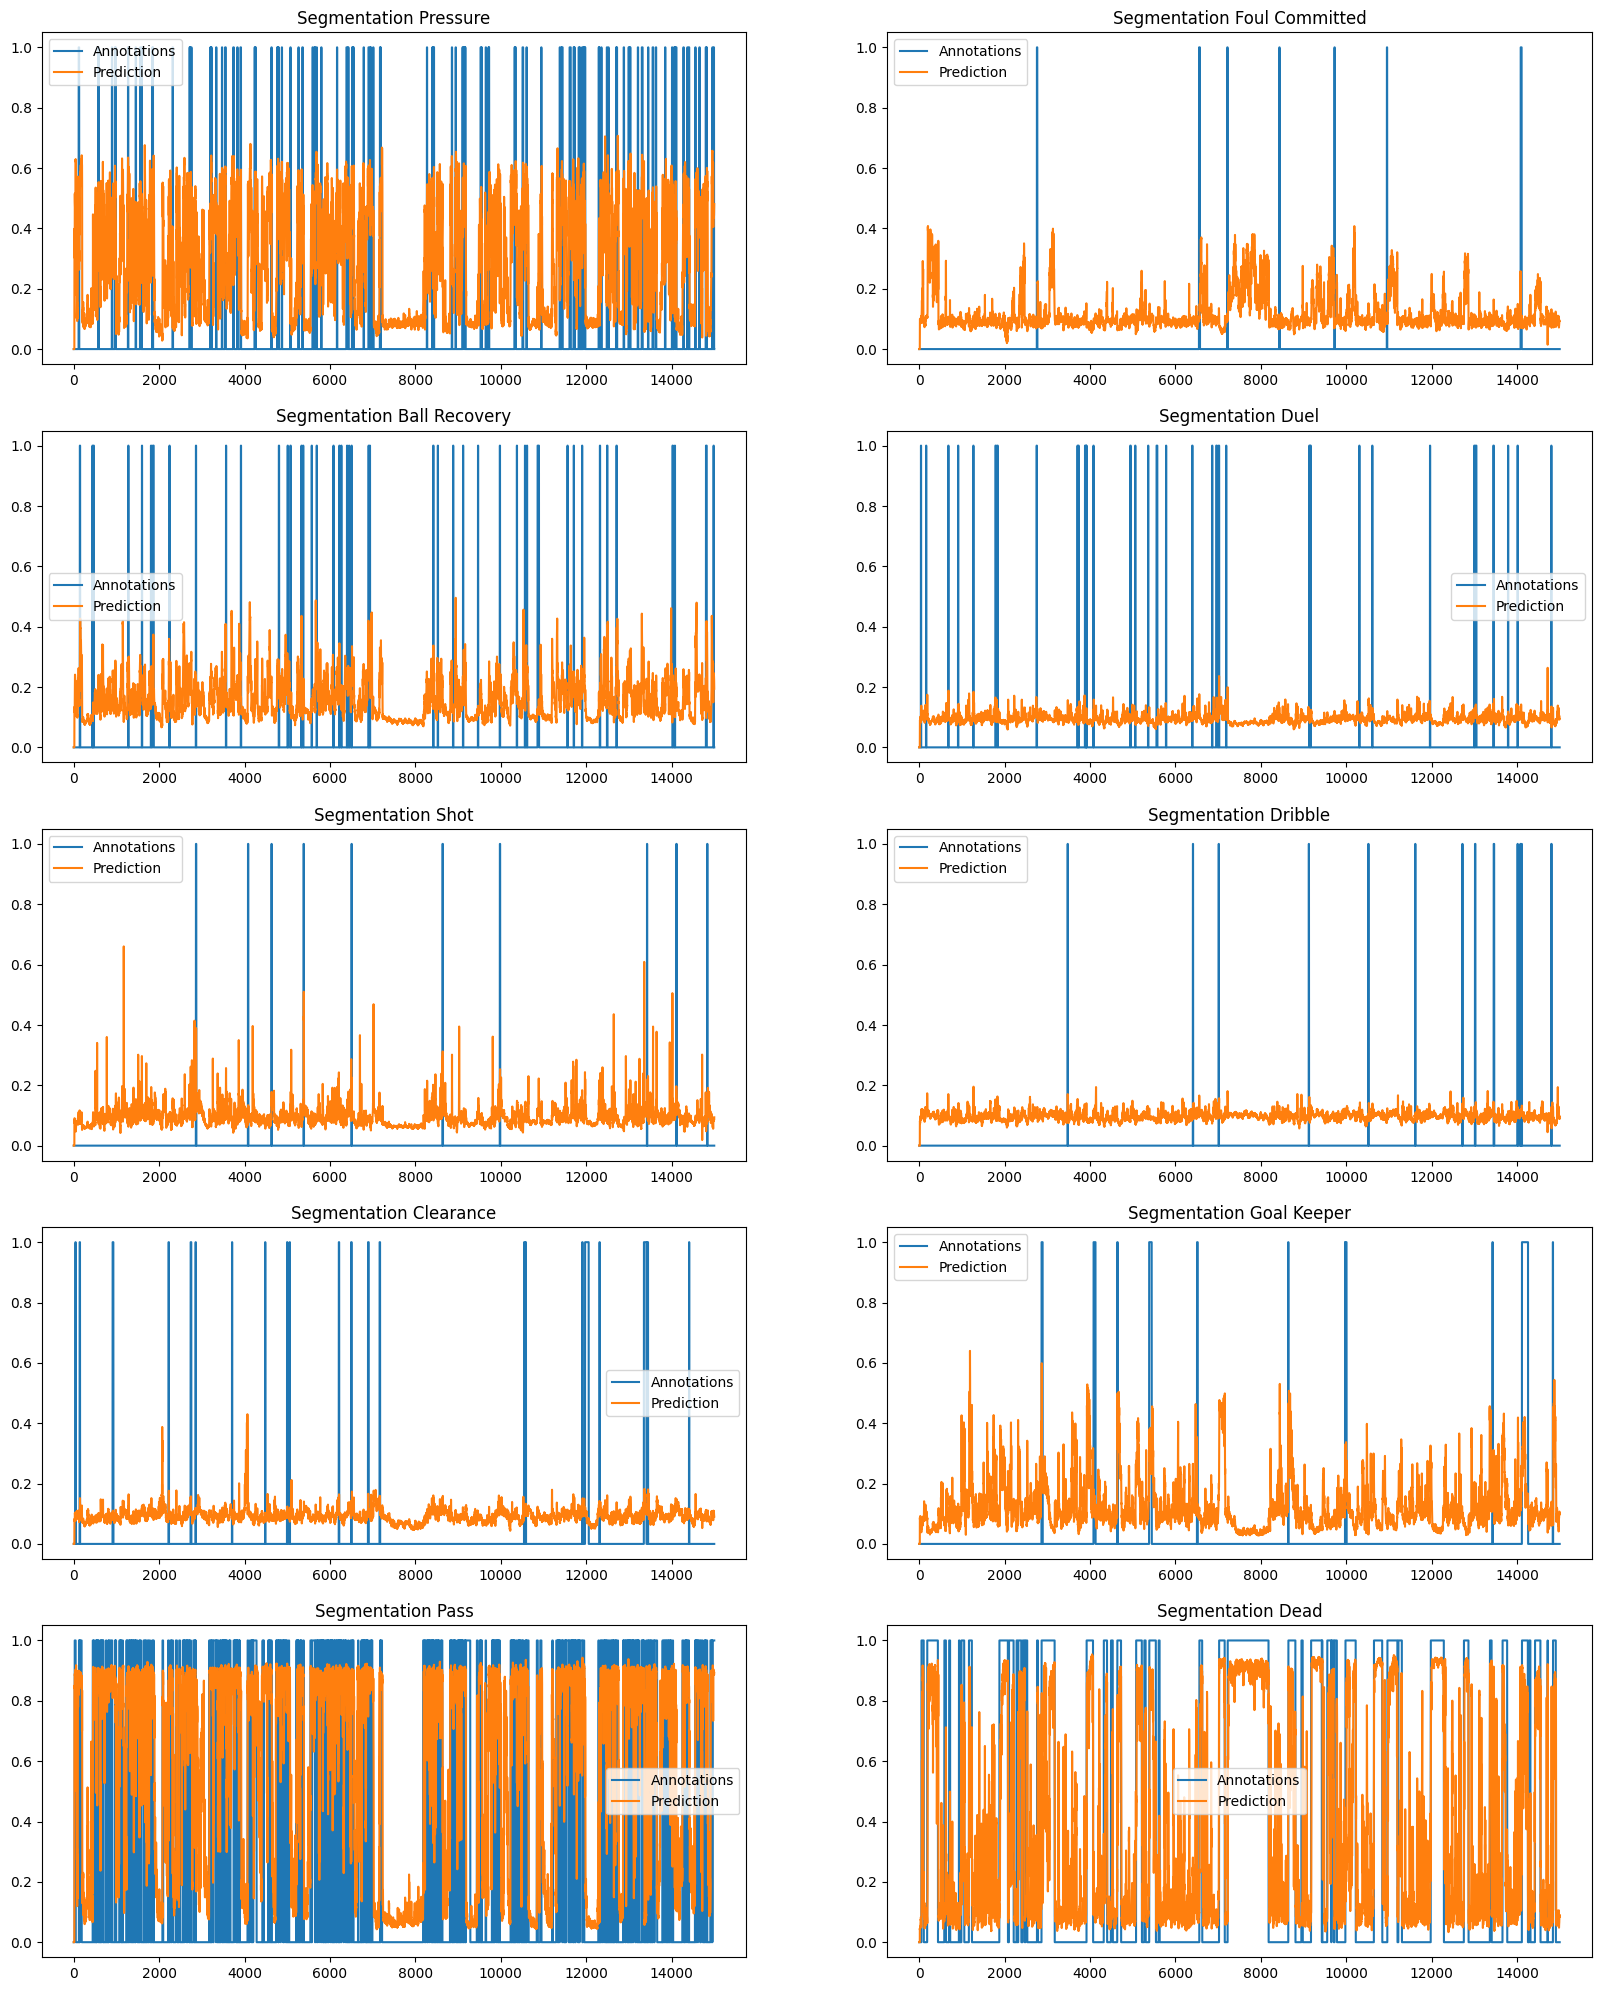

In [5]:
args = Args
collate_fn = collateVisGCN
model_path = "models/detector_extended.pth.tar"
model = torch.load(model_path)
visualiser = Visualiser(collate_fn, args, model, smooth_rate=None, val=True)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation=None)

In [6]:
visualiser.calculate_MAP()

array([0.20237728, 0.19154552, 0.0190119 , 0.05437397, 0.06090931,
       0.05152383, 0.03002344, 0.05504532, 0.10059406, 0.54238269,
       0.91836274])

# Model with probabilities of choosing classes while training

In [2]:
@dataclass
class Args:
    receptive_field = 6
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 30
    batch_size = 32
    input_channel = 13
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.0
    loss_weight_detection=0.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 10
    K_parameters = get_K_params(chunk_size)
    focused_annotation = None
    generate_augmented_data = True

In [3]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency,
                    save_dir=f"models/detector_probs.pth.tar")

with open(f'results/detector_probs.pkl', 'wb') as file:
    pickle.dump(losses, file)

Get labels & features: 100%|██████████| 8/8 [02:26<00:00, 18.30s/it]
Train 1: Time 3.063s (it:2.743s) Data:0.572s (it:0.513s) Loss 1.7617e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:54<00:00,  3.06s/it]
Evaluate 1: Time 1.566s (it:1.354s) Data:0.430s (it:0.386s) Loss 2.3041e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:29<00:00,  1.57s/it]
Train 2: Time 2.875s (it:2.629s) Data:0.523s (it:0.475s) Loss 1.6262e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:43<00:00,  2.87s/it]
Evaluate 2: Time 1.434s (it:1.851s) Data:0.409s (it:0.408s) Loss 1.7420e+04 : 100%|█████████████████████████████████████████████| 57/57 [01:21<00:00,  1.43s/it]
Train 3: Time 2.922s (it:2.899s) Data:0.537s (it:0.517s) Loss 1.5292e+04 : 100%|████████████████████████████████████████████████| 57/57 [02:46<00:00,  2.92s/it]
Evaluate 3: Time 1.493s (it:1.550s) Data:0.413s (it:0.396s) Loss 1.5017e+04 : 100%|███████████████████████████████████████████

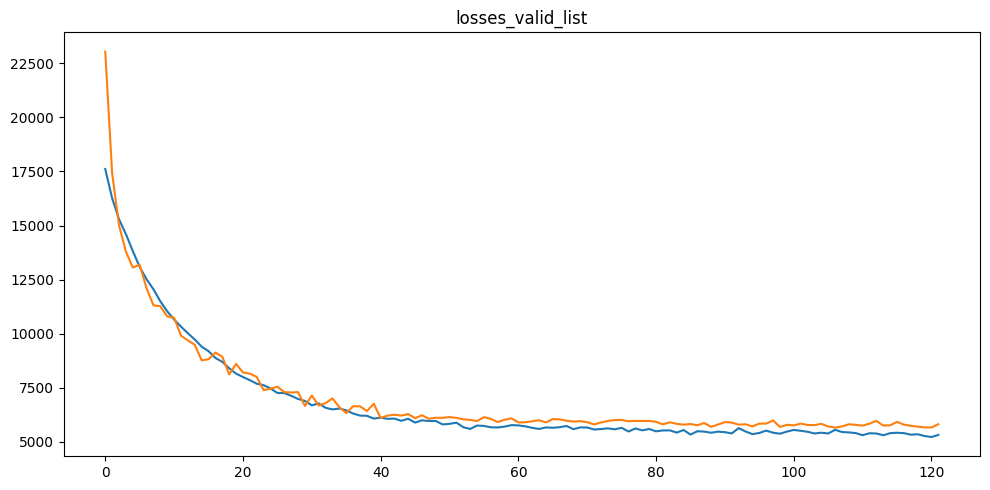

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ]
# Loop through each subplot

loss_pair = loss_pairs[0]
for loss in loss_pair:
    ax.plot(losses.__dict__[loss])
    ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Data preprocessing: 100%|██████████| 1/1 [00:07<00:00,  7.66s/it]


(<Figure size 2000x2500 with 10 Axes>,
 array([[<Axes: title={'center': 'Segmentation Pressure'}>,
         <Axes: title={'center': 'Segmentation Foul Committed'}>],
        [<Axes: title={'center': 'Segmentation Ball Recovery'}>,
         <Axes: title={'center': 'Segmentation Duel'}>],
        [<Axes: title={'center': 'Segmentation Shot'}>,
         <Axes: title={'center': 'Segmentation Dribble'}>],
        [<Axes: title={'center': 'Segmentation Clearance'}>,
         <Axes: title={'center': 'Segmentation Goal Keeper'}>],
        [<Axes: title={'center': 'Segmentation Pass'}>,
         <Axes: title={'center': 'Segmentation Dead'}>]], dtype=object))

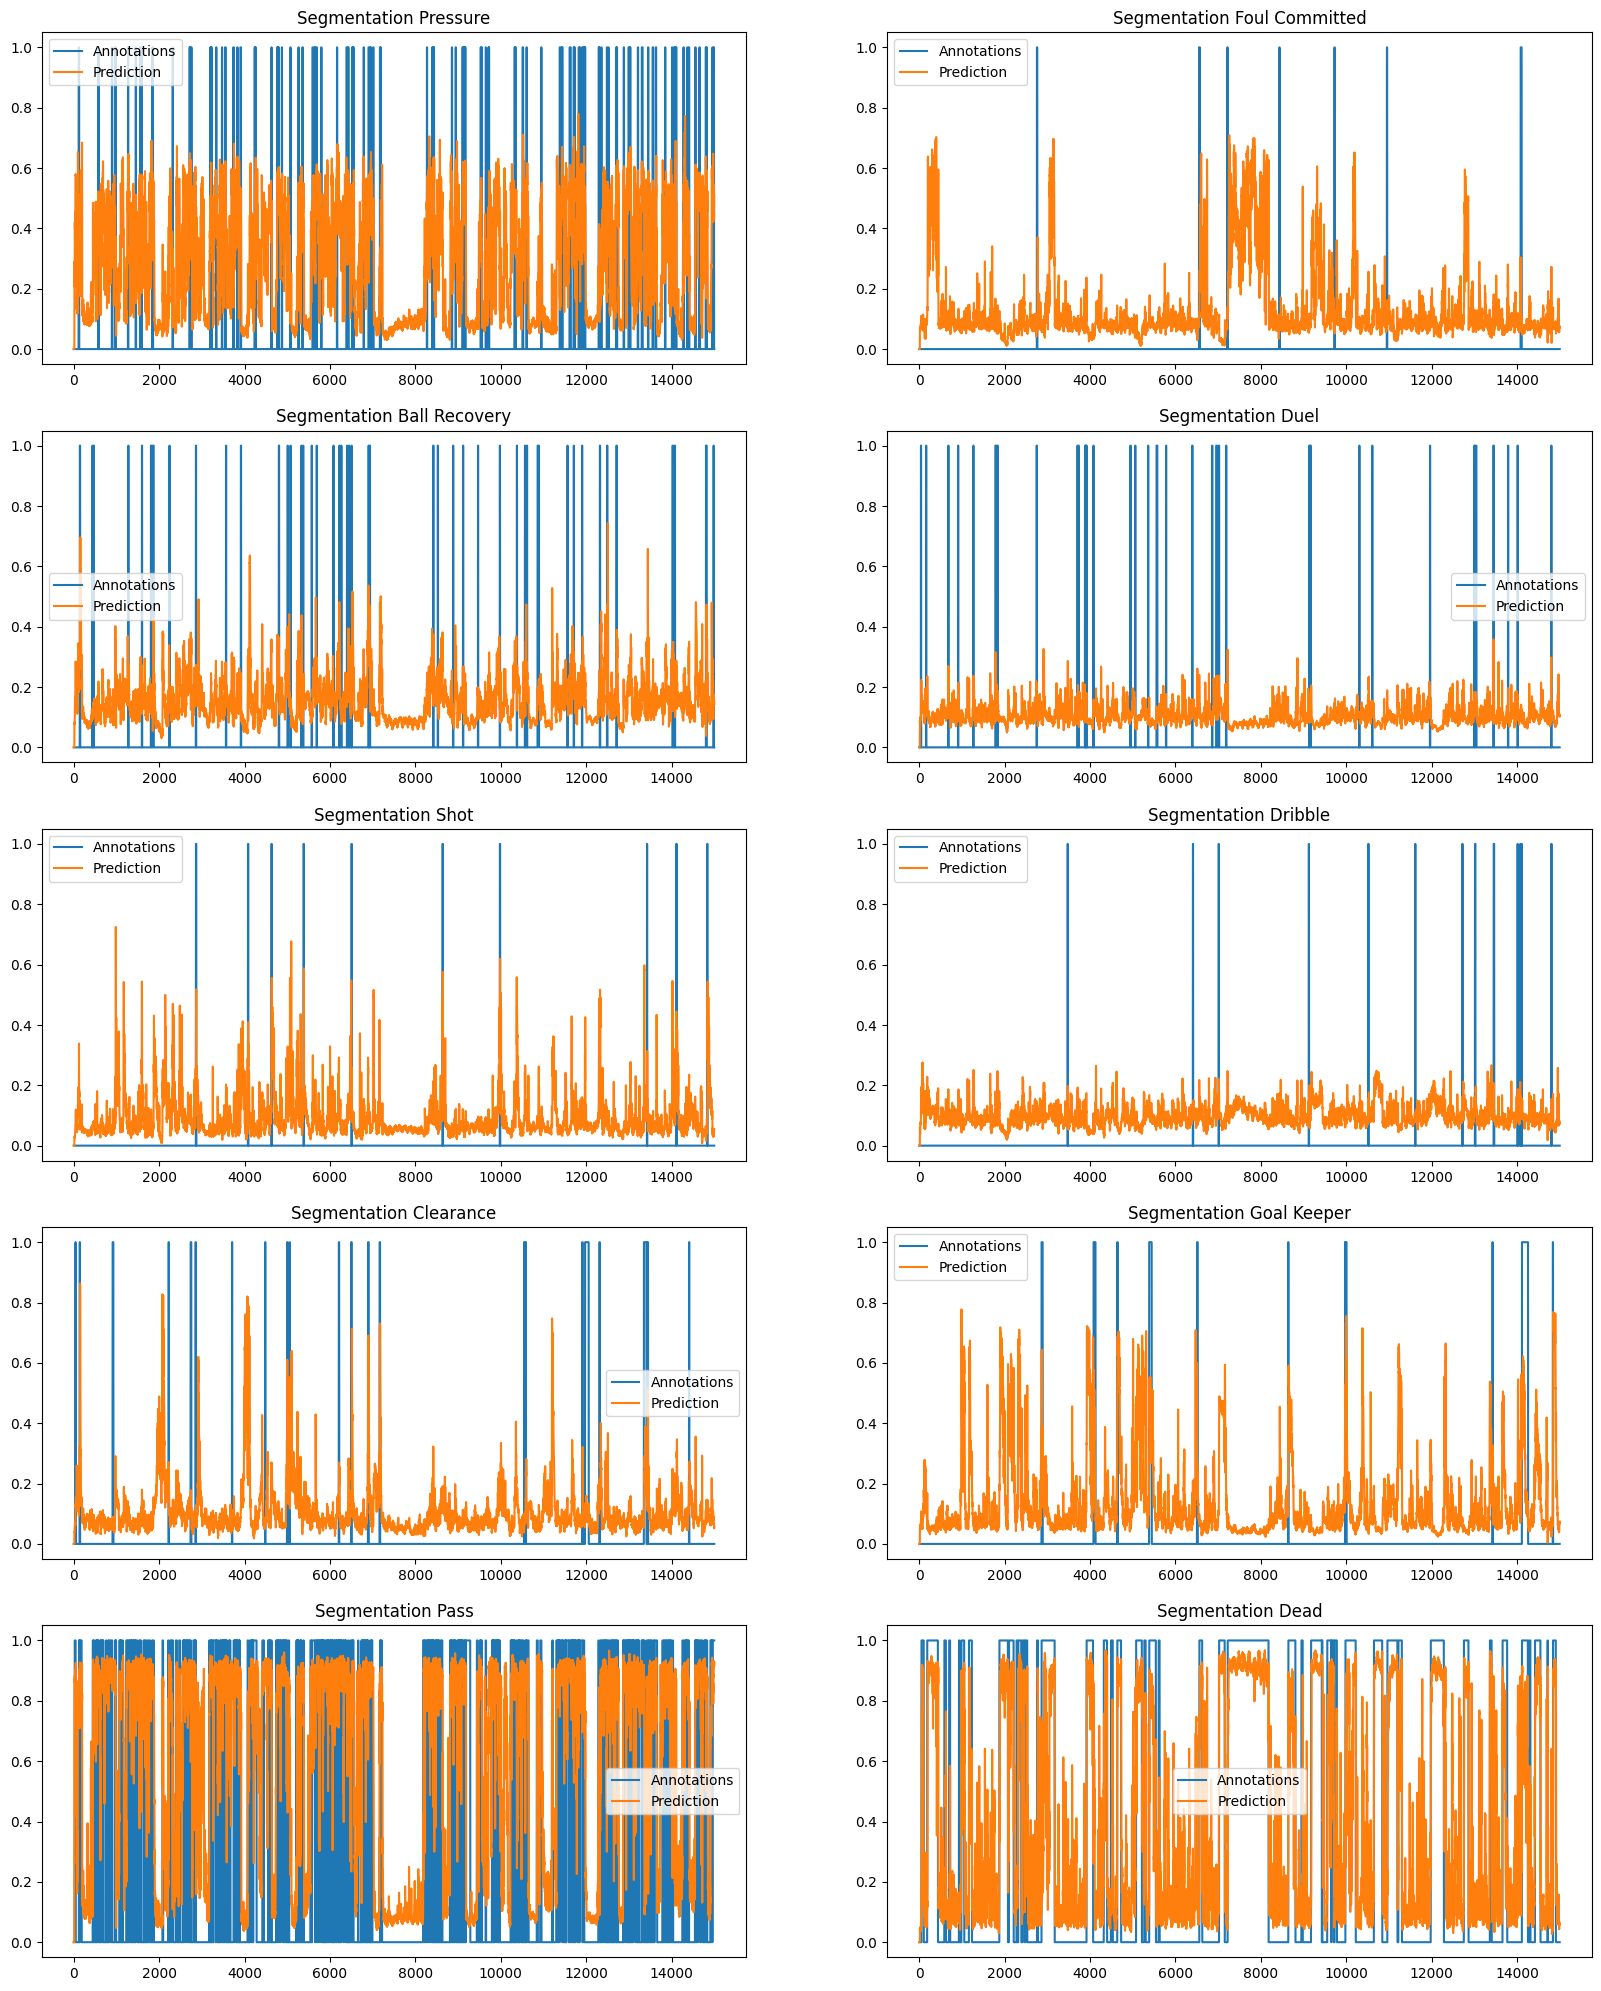

In [5]:
args = Args
collate_fn = collateVisGCN
model_path = "models/detector_probs.pth.tar"
model = torch.load(model_path)
visualiser = Visualiser(collate_fn, args, model, smooth_rate=None, val=True)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation=None)

In [6]:
visualiser.calculate_MAP()

array([0.20780316, 0.21019562, 0.01766594, 0.0603684 , 0.06239615,
       0.05085357, 0.0209219 , 0.06689098, 0.11412751, 0.55482234,
       0.91978915])

Data preprocessing: 100%|██████████| 1/1 [00:08<00:00,  8.68s/it]


TypeError: cannot unpack non-iterable NoneType object

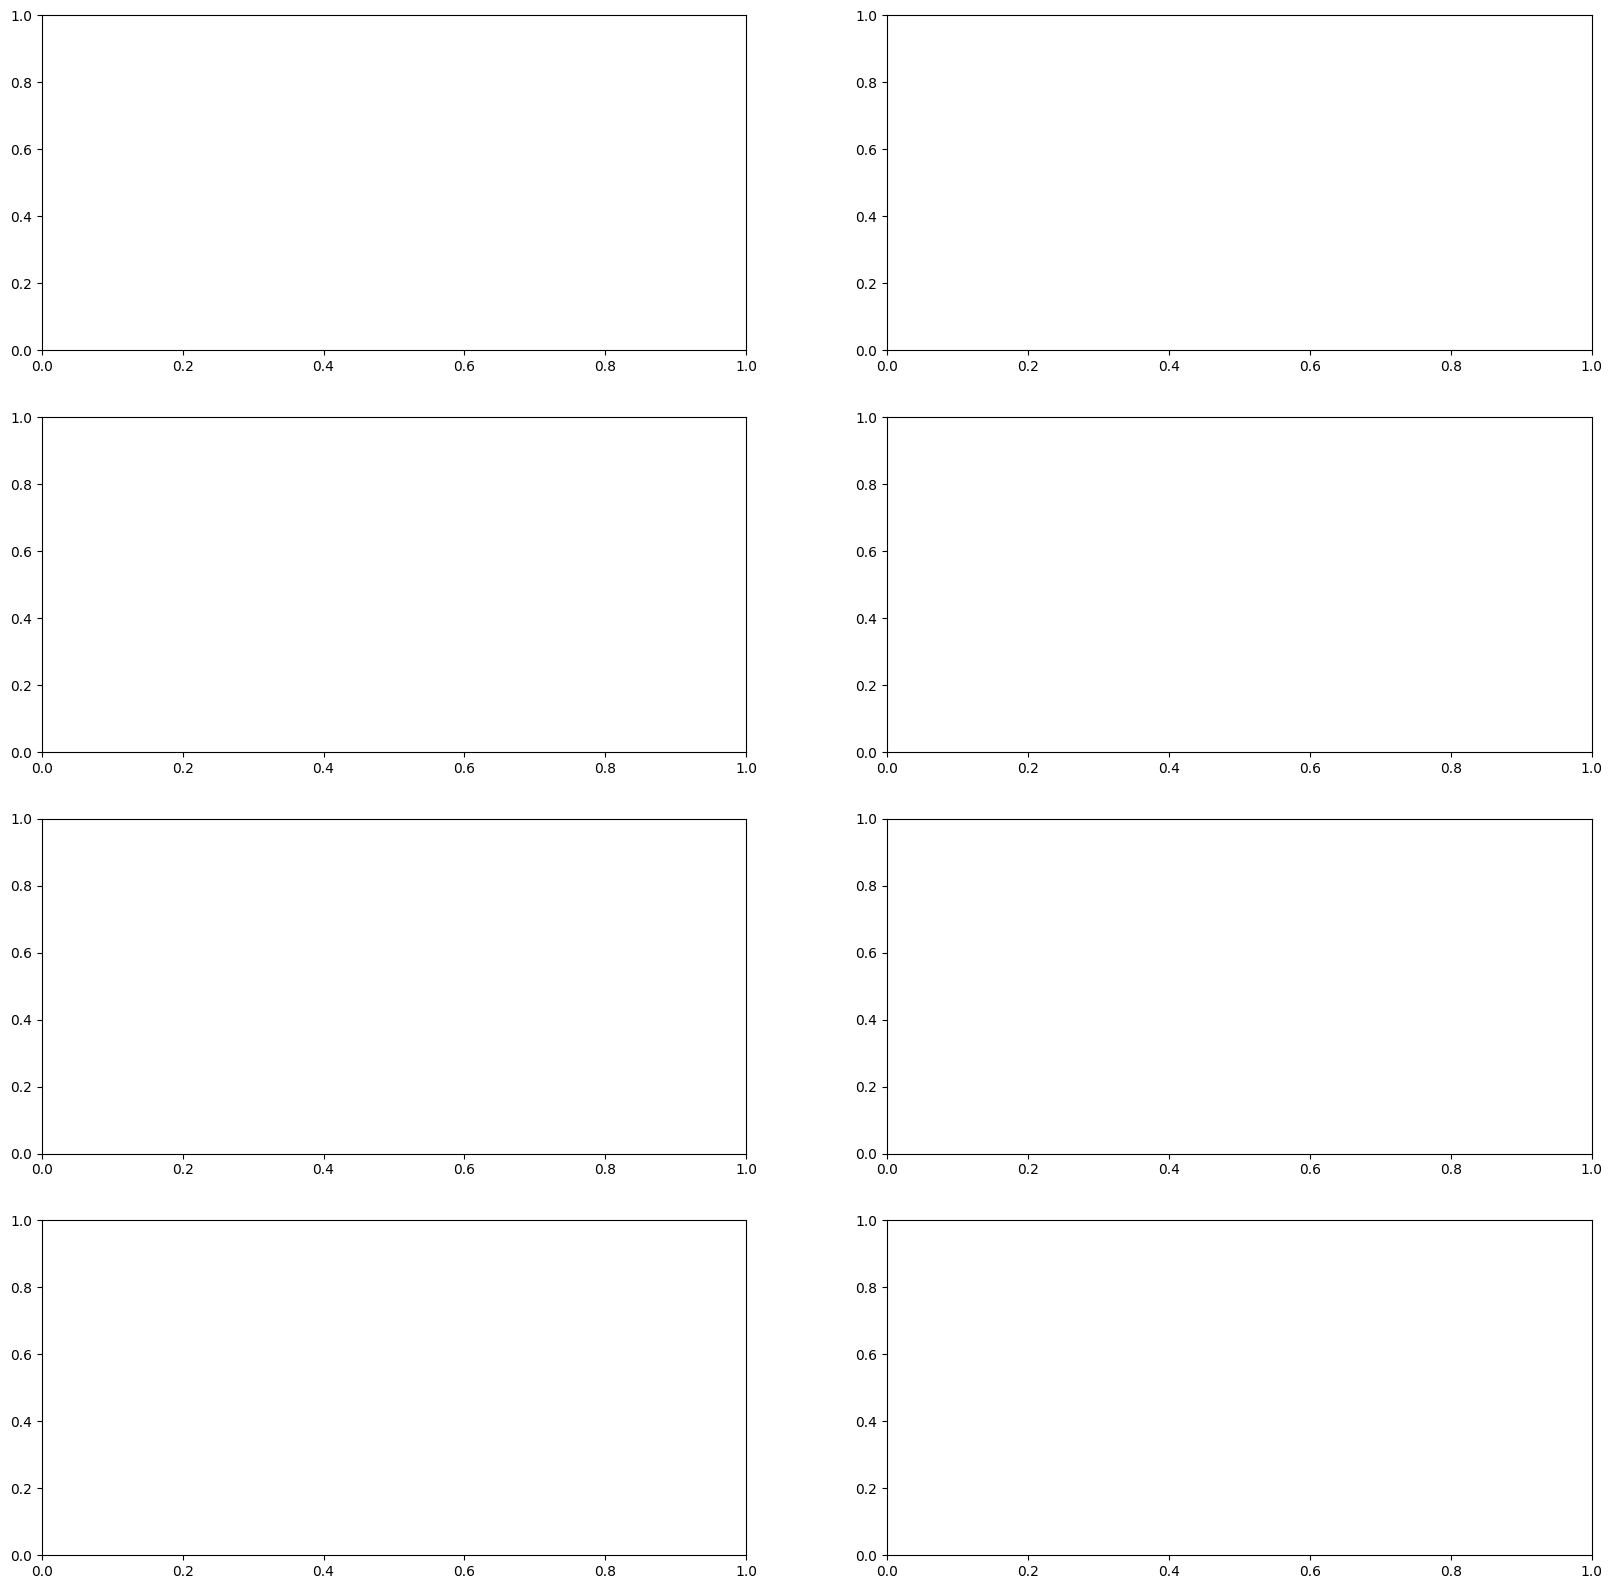

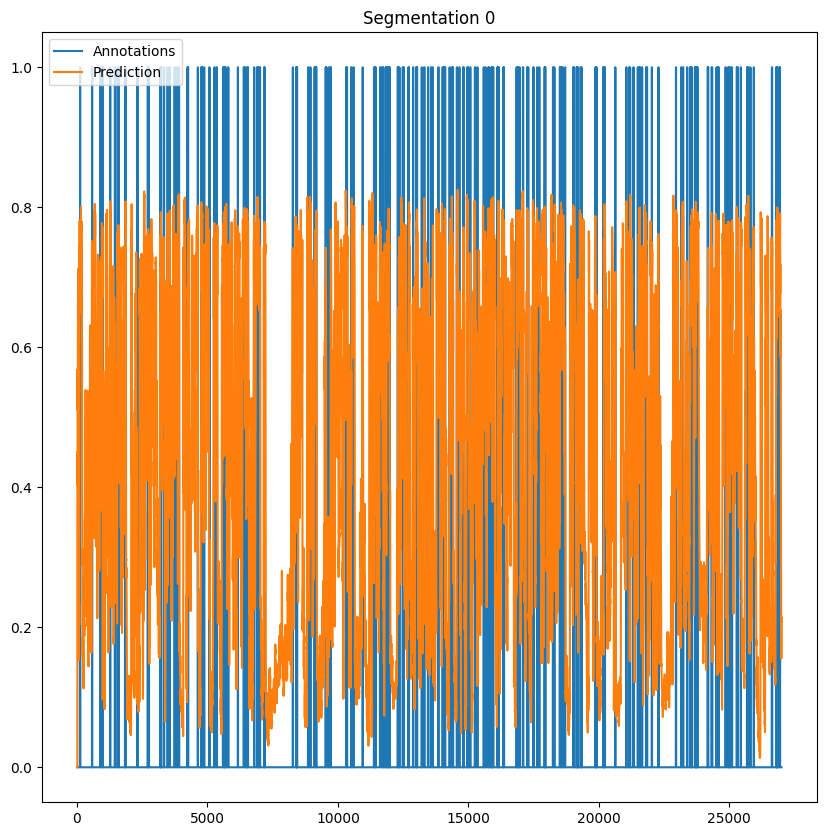

In [27]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes_flattened = axes.flatten()

for i, ann in enumerate(event_enc.keys()):
    args = Args
    args.focused_annotation = ann

    collate_fn = collateVisGCN
    model_path = f"models/detector_{ann}.pth.tar"
    model = torch.load(model_path)

    visualiser = Visualiser(collate_fn, args, model, smooth_rate=None, val=True, ann=8)
    _, ax = visualiser.plot_predictions(frame_threshold=27000, save_dir="plots/PredictionsPlot.png", annotation=ann)
    
    axes_flattened[i].plot(ax.get_lines()[0].get_xdata(), ax.get_lines()[0].get_ydata())
    axes_flattened[i].plot(ax.get_lines()[1].get_xdata(), ax.get_lines()[1].get_ydata())
    axes_flattened[i].set_title(ann)

plt.show()

# Model with more features

In [ ]:
@dataclass
class Args:
    receptive_field = 6
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 30
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.0
    loss_weight_detection=0.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 8
    K_parameters = get_K_params(chunk_size)
    focused_annotation = None
    
train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency,
                    save_dir=f"models/detector_features.pth.tar")

with open(f'results/detector_features.pkl', 'wb') as file:
    pickle.dump(losses, file)

In [ ]:
args = Args
collate_fn = collateGCN

In [4]:
from DataManager import DataManager
from FileFinder import find_files
listGames = find_files("../football_games")
DM = DataManager(files=listGames[10:12], framerate=args.framerate/25, alive=False)
DM.read_games()

Data preprocessing: 100%|██████████| 2/2 [00:17<00:00,  8.51s/it]


In [8]:
visualiser.segmentation


array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.86346453],
       [0.86303633],
       [0.86122994]])

In [8]:
print(cols)
print(rows)

[ 0 13  1  4  6  8  9 16 17 18 19 20 21  2  4  7  9 10  3  1  2  4  6  9
 16 17 19 20  5  6  8  9 19  1  4  5  6  8  9 16 19 20  2  7 10 14 15 17
  1  5  6  8 11 13 19 20  1  2  4  5  6  9  2  7 10 15  8 11 13 18 19 20
 12  0  8 11 13 19  7 14 15 17 21  7 10 14 15 17  1  4  6 16 17 18 19 20
 21  1  4  7 14 15 16 17 20 21  1 11 16 18 19 20 21  1  4  5  6  8 11 13
 16 18 19 20  1  4  6  8 11 16 17 18 19 20 21  1 14 16 17 18 20 21]
[ 0  0  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  3  4  4  4  4  4
  4  4  4  4  5  5  5  5  5  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 11 11 11 11 11 11
 12 13 13 13 13 13 14 14 14 14 14 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 19 19 19 19 19 19 19
 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21]


In [22]:
# distance_init = np.random.random((2,2))
# threshold = 0.6

# distance = np.where(distance_init > threshold, distance_init, 0)
print(distance_init)
print(distance)
rows, cols = np.nonzero(distance)
print(np.stack((rows, cols)))

[[0.6161028  0.47454153]
 [0.40056199 0.34439221]]
[[0.6161028 0.       ]
 [0.        0.       ]]
[[0]
 [0]]


In [24]:
DM.edges[game_indx][frame][2,4]

1

In [4]:
args = Args
collate_fn = collateGCN
validation_dataset = CALFData(split="validate", args=args)
validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
import os
# os.chdir("Code2")
model_path = "models/detector3.pth.tar"
model = torch.load(model_path)

os.chdir("..")
from FilterNet.filternet.models.filter_net import FilterNet
model2 = FilterNet(input_channels=8, output_channels=[8])

Get labels & features: 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]


In [6]:
labels, targets, representations = next(iter(validate_loader))

In [7]:
segmentation = model(representations)

In [8]:
segmentation_reshaped = segmentation.permute(0, 2, 1)

In [9]:
res = model2(segmentation_reshaped)

In [10]:
model2

FilterNet(
  (down_stack_1): Sequential(
    (0): CGLLayer(
      (0): Dropout2d(p=0.1, inplace=False)
      (1): Conv1d(8, 300, kernel_size=(5,), stride=(1,), padding=(2,))
      (2): ReLU()
      (3): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): CGLLayer(
      (0): Dropout2d(p=0.1, inplace=False)
      (1): Conv1d(300, 300, kernel_size=(5,), stride=(1,), padding=(2,))
      (2): ReLU()
      (3): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
      (4): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): CGLLayer(
      (0): Dropout2d(p=0.1, inplace=False)
      (1): Conv1d(300, 300, kernel_size=(5,), stride=(1,), padding=(2,))
      (2): ReLU()
      (3): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
      (4): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): CGLLayer(
      (0): Dropout2d(p=0.1, inplace=False)
      (1): Con

In [18]:
import os
import pickle
import typing as ty

import numpy as np
import pandas as pd
import sklearn.metrics
import torch
import torch.nn.functional as F
import torch.optim
import traits.api as t
from torch.utils.data import DataLoader, TensorDataset

from FilterNet.filternet import models
from FilterNet.filternet.datasets import sliding_window_x_y
from FilterNet.filternet.models.reference_architectures import get_ref_arch
from FilterNet.filternet.mputil import Timer
from FilterNet.filternet.training.train import Trainer

In [20]:
trainer = Trainer()


In [21]:
trainer.